In [1]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["hungary_chickenpox.csv"]))
data.head()

Saving hungary_chickenpox.csv to hungary_chickenpox.csv


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [2]:
# Displaying dataset structure
data_info = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Column Names": data.columns.tolist(),
    "Data Types": data.dtypes.tolist(),
    "Missing Values": data.isnull().sum().tolist()
}

data_info


{'Number of Rows': 522,
 'Number of Columns': 21,
 'Column Names': ['Date',
  'BUDAPEST',
  'BARANYA',
  'BACS',
  'BEKES',
  'BORSOD',
  'CSONGRAD',
  'FEJER',
  'GYOR',
  'HAJDU',
  'HEVES',
  'JASZ',
  'KOMAROM',
  'NOGRAD',
  'PEST',
  'SOMOGY',
  'SZABOLCS',
  'TOLNA',
  'VAS',
  'VESZPREM',
  'ZALA'],
 'Data Types': [dtype('O'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64')],
 'Missing Values': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [3]:
# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Verify the conversion by checking the data types
data.dtypes


Date        datetime64[ns]
BUDAPEST             int64
BARANYA              int64
BACS                 int64
BEKES                int64
BORSOD               int64
CSONGRAD             int64
FEJER                int64
GYOR                 int64
HAJDU                int64
HEVES                int64
JASZ                 int64
KOMAROM              int64
NOGRAD               int64
PEST                 int64
SOMOGY               int64
SZABOLCS             int64
TOLNA                int64
VAS                  int64
VESZPREM             int64
ZALA                 int64
dtype: object

In [4]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display the number of duplicate rows and the duplicate rows (if any)
num_duplicates = duplicate_rows.shape[0]
num_duplicates, duplicate_rows


(0,
 Empty DataFrame
 Columns: [Date, BUDAPEST, BARANYA, BACS, BEKES, BORSOD, CSONGRAD, FEJER, GYOR, HAJDU, HEVES, JASZ, KOMAROM, NOGRAD, PEST, SOMOGY, SZABOLCS, TOLNA, VAS, VESZPREM, ZALA]
 Index: []
 
 [0 rows x 21 columns])

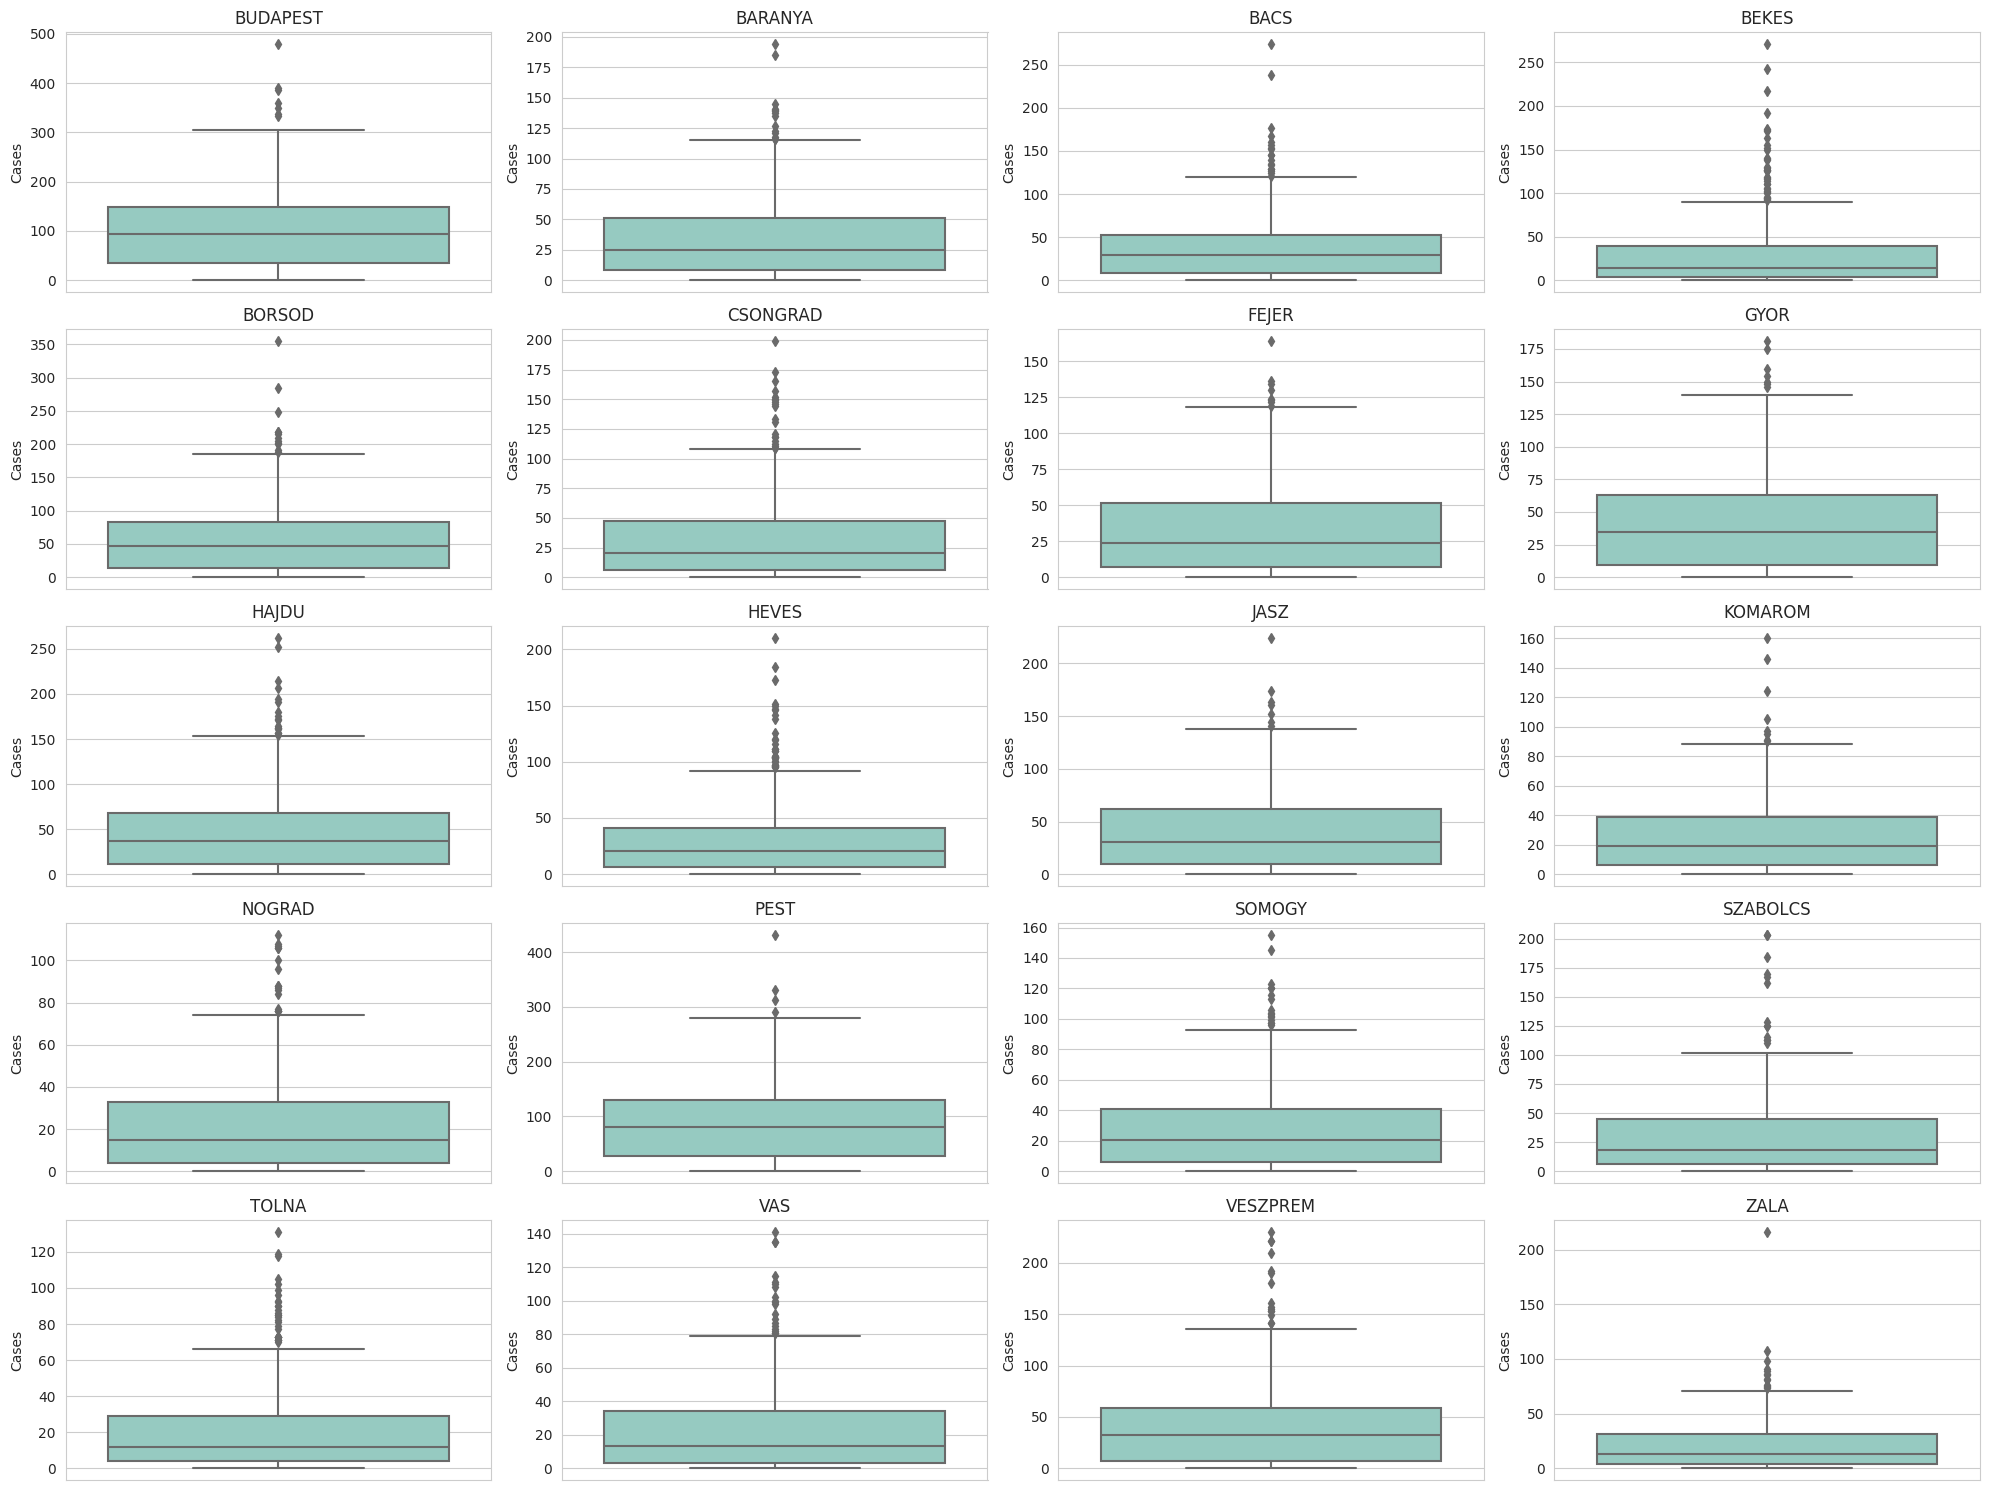

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualization
sns.set_style("whitegrid")

# Create box plots for the regions in groups
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

# Split the columns into groups for visualization
columns = data.columns[1:]
group_size = 4

# Display box plots
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        sns.boxplot(y=columns[i], data=data, ax=ax, palette="Set3")
        ax.set_title(columns[i])
        ax.set_ylabel('Cases')

plt.tight_layout()
plt.show()


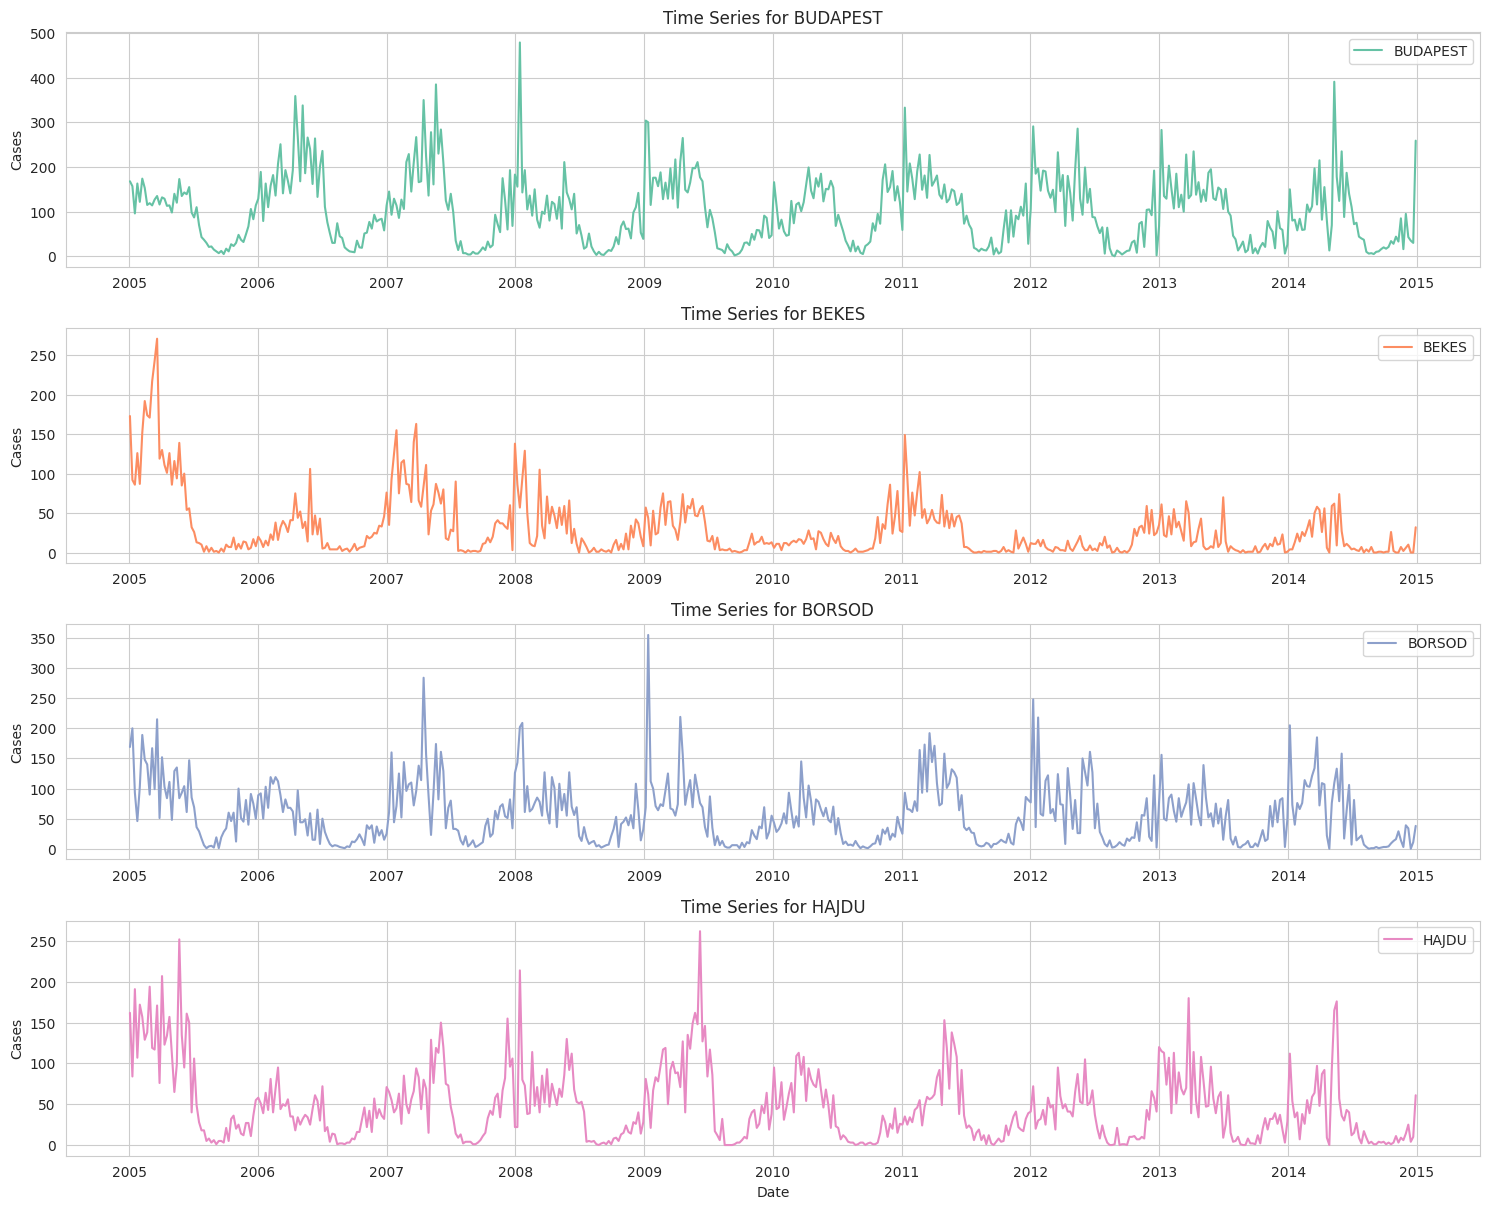

In [6]:
# Selected regions based on box plots
selected_regions = ['BUDAPEST', 'BEKES', 'BORSOD', 'HAJDU']

# Plotting time series data for selected regions
fig, axes = plt.subplots(nrows=len(selected_regions), ncols=1, figsize=(15, 12))

for i, region in enumerate(selected_regions):
    axes[i].plot(data['Date'], data[region], label=region, color=sns.color_palette("Set2")[i])
    axes[i].set_title(f'Time Series for {region}')
    axes[i].set_ylabel('Cases')
    axes[i].legend()

plt.tight_layout()
plt.xlabel('Date')
plt.show()


In [7]:
# Compute summary statistics for the regions
summary_statistics = data.describe().transpose()[['mean', '50%', 'std', 'min', 'max']]
summary_statistics.columns = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max']

summary_statistics


,Mean,Median,Standard Deviation,Min,Max
BUDAPEST,101.245211,93.0,76.354872,0.0,479.0
BARANYA,34.204981,25.0,32.567222,0.0,194.0
BACS,37.166667,29.5,36.843095,0.0,274.0
BEKES,28.911877,14.0,37.618092,0.0,271.0
BORSOD,57.082375,46.5,50.725437,0.0,355.0
CSONGRAD,31.488506,20.5,33.790208,0.0,199.0
FEJER,33.272031,24.0,31.397989,0.0,164.0
GYOR,41.436782,35.0,36.014297,0.0,181.0
HAJDU,47.097701,37.0,44.610836,0.0,262.0
HEVES,29.691571,21.0,31.857750,0.0,210.0


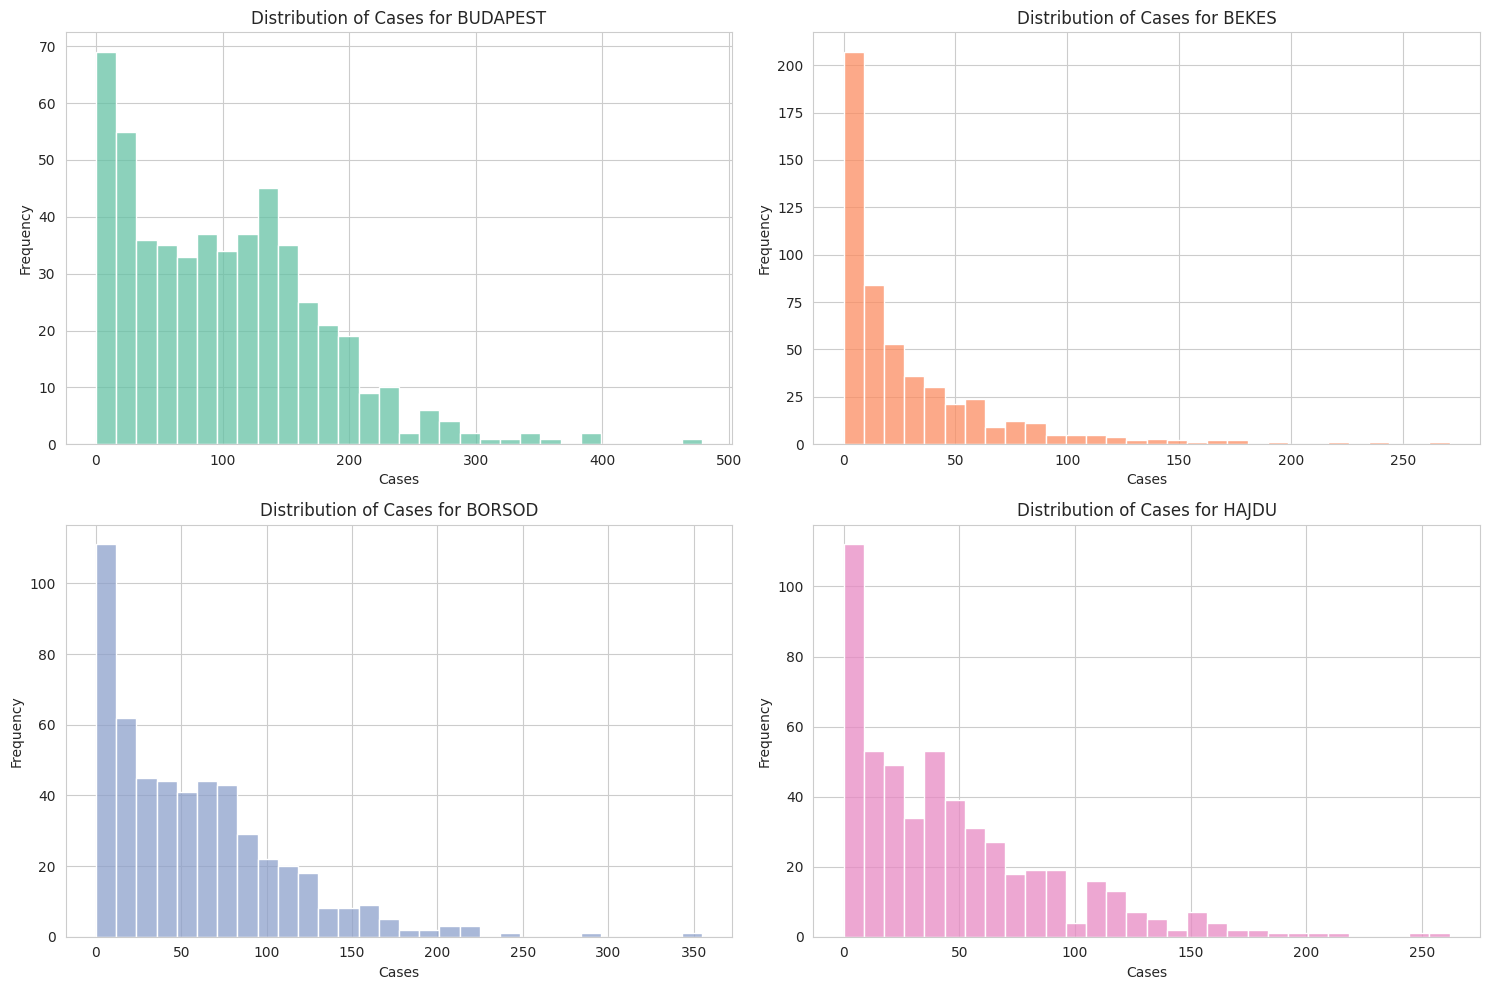

In [8]:
# Plotting histograms for selected regions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Display histograms for selected regions
for i, ax in enumerate(axes.flatten()):
    region = selected_regions[i]
    sns.histplot(data[region], bins=30, ax=ax, color=sns.color_palette("Set2")[i])
    ax.set_title(f'Distribution of Cases for {region}')
    ax.set_xlabel('Cases')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


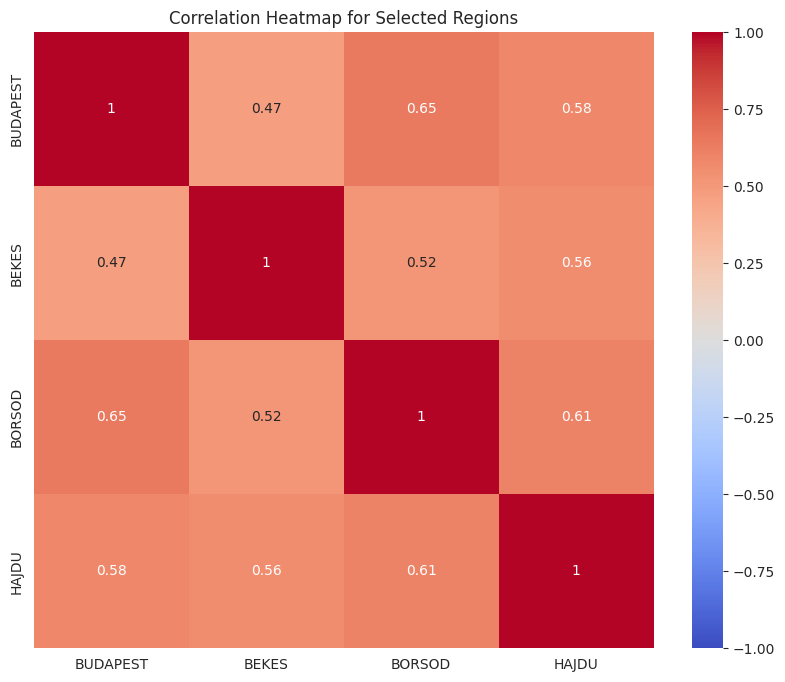

In [9]:
# Compute the correlation matrix for the regions
correlation_matrix = data[selected_regions].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Regions")
plt.show()


In [10]:
# Create new time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

# Display the first few rows with the new features
data[['Date', 'Year', 'Month', 'Week']].head()


<ipython-input-10-3f1ca75f3e3d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Date,Year,Month,Week
0,2005-01-03,2005,1,1
1,2005-01-10,2005,1,2
2,2005-01-17,2005,1,3
3,2005-01-24,2005,1,4
4,2005-01-31,2005,1,5


In [11]:
# Setting the split point: 80% for training and 20% for testing
split_point = int(0.8 * len(data))

# Splitting the dataset into features (X) and target (y)
# For simplicity, let's predict chickenpox cases for the BUDAPEST region using other regions and time-based features as predictors.
X = data.drop(columns=['Date', 'BUDAPEST'])
y = data['BUDAPEST']

# Splitting the features and target into training and testing sets
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((417, 22), (105, 22), (417,), (105,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on test data
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Compute RMSE for each model
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

lr_rmse, rf_rmse, xgb_rmse


(48.56988891167458, 47.11820998702044, 50.96112490629104)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

# Initialize GridSearchCV for Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the associated RMSE
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_)**0.5

best_params, best_rmse


({'max_depth': 10, 'n_estimators': 100}, 46.92647512163944)

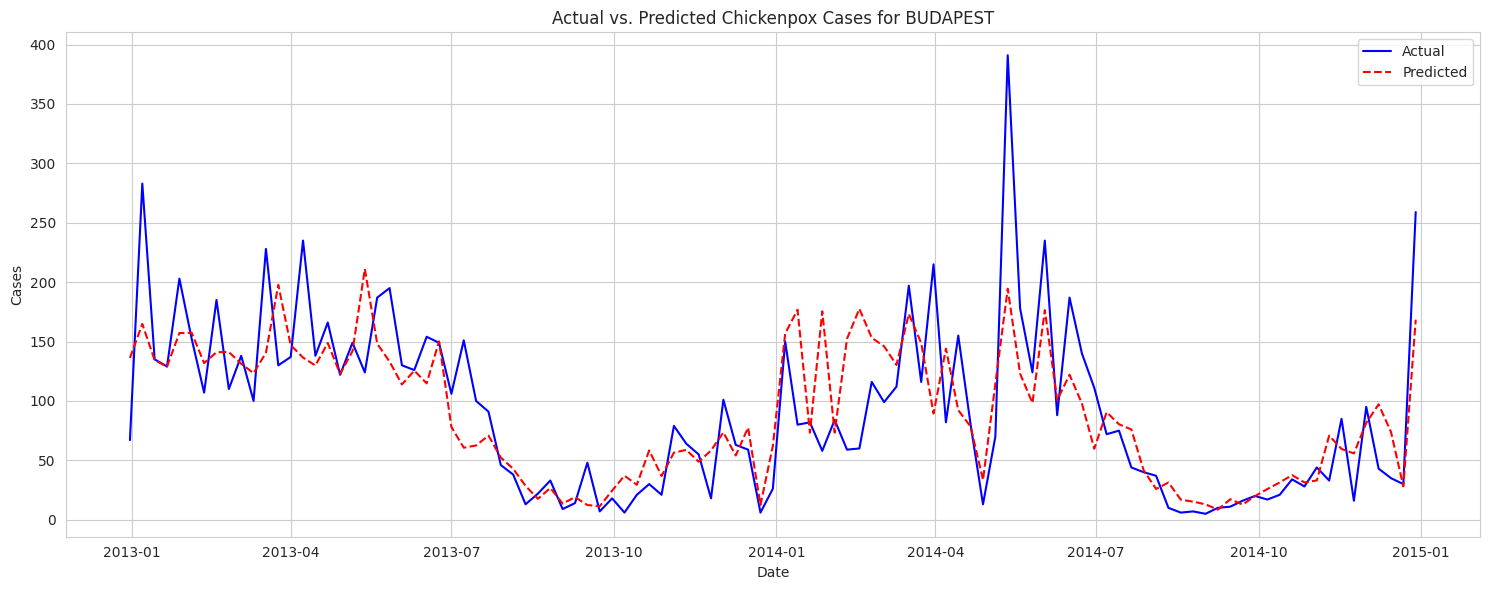

(31.775916178825515, 0.577693020286298)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Train the Random Forest model using the best hyperparameters
best_rf = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
best_rf.fit(X_train, y_train)

# Predict on the test set
rf_best_preds = best_rf.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, rf_best_preds)
r2 = r2_score(y_test, rf_best_preds)

# Plot actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][split_point:], y_test, label='Actual', color='blue')
plt.plot(data['Date'][split_point:], rf_best_preds, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted Chickenpox Cases for BUDAPEST')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.show()

mae, r2


In [16]:
# Train the Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
best_rf.fit(X_train, y_train)

# Predict on test data
best_rf_preds = best_rf.predict(X_test)

# Compute RMSE for the tuned model
best_rf_rmse = mean_squared_error(y_test, best_rf_preds, squared=False)

best_rf_rmse


47.05851298256215

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE for the tuned Random Forest model
best_rf_rmse = mean_squared_error(y_test, best_rf_preds, squared=False)

# Compute additional metrics: MAE and R^2
best_rf_mae = mean_absolute_error(y_test, best_rf_preds)
best_rf_r2 = r2_score(y_test, best_rf_preds)

best_rf_rmse, best_rf_mae, best_rf_r2


(47.05851298256215, 31.775916178825515, 0.577693020286298)

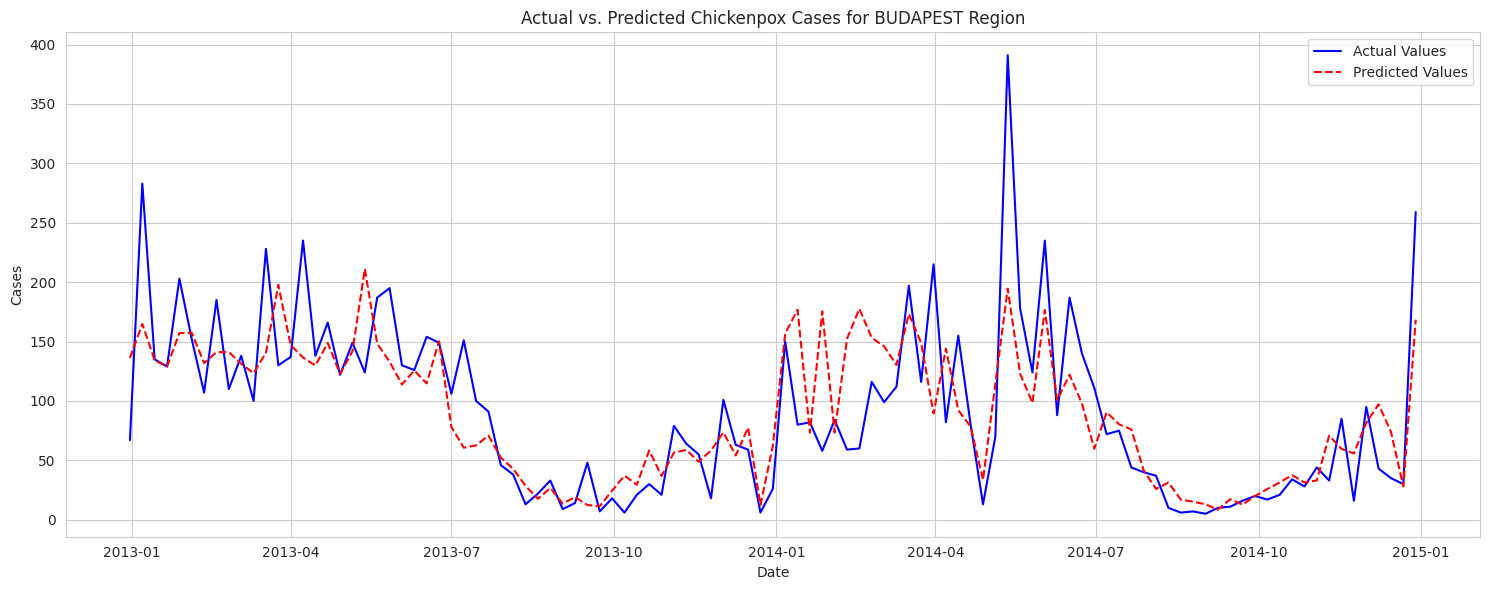

In [18]:
# Plotting actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(data['Date'].iloc[split_point:], y_test, label='Actual Values', color='blue')
plt.plot(data['Date'].iloc[split_point:], best_rf_preds, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs. Predicted Chickenpox Cases for BUDAPEST Region')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0))
]

# Initialize the stacking regressor with a linear regression meta-model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Predict on the test data
stacked_preds = stacked_model.predict(X_test)

# Compute RMSE for the stacked model
stacked_rmse = mean_squared_error(y_test, stacked_preds, squared=False)

stacked_rmse


47.67857905582256

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Re-initializing the base models and the stacked model
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0))
]

stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Predict on the test data
stacked_preds = stacked_model.predict(X_test)

# Compute RMSE for the stacked model
stacked_rmse = mean_squared_error(y_test, stacked_preds, squared=False)

stacked_rmse


47.67857905582256

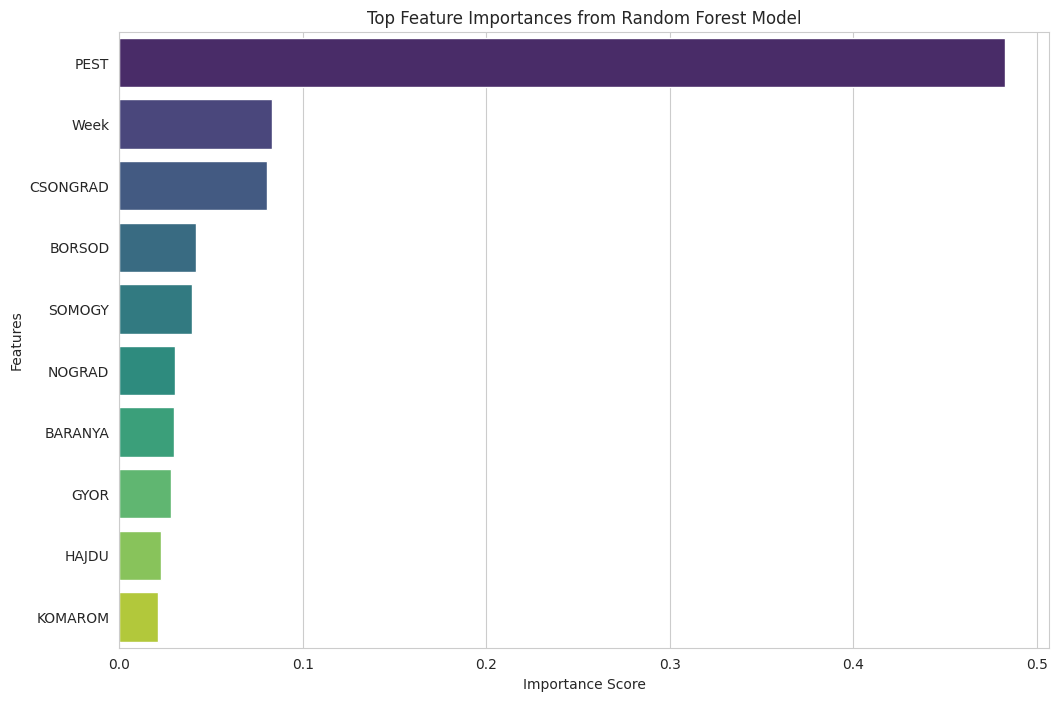

In [21]:
# Extracting feature importance scores from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Mapping feature names to their importance scores
features_dict = dict(zip(X_train.columns, feature_importances))

# Sorting the features based on importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

# Extracting top features for visualization
top_features = sorted_features[:10]
feature_names = [feature[0] for feature in top_features]
importance_scores = [feature[1] for feature in top_features]

# Visualizing the top feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_scores, y=feature_names, palette="viridis")
plt.title('Top Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [22]:
# Compiling RMSE values for each model
model_names = ['Linear Regression', 'Random Forest', 'Stacking Ensemble']
rmse_values = [lr_rmse, best_rf_rmse, stacked_rmse]

# Creating a DataFrame for comparison
model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values
})

model_comparison_df.sort_values(by='RMSE')


,Model,RMSE
1,Random Forest,47.058513
2,Stacking Ensemble,47.678579
0,Linear Regression,48.569889


In [23]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.3 MB/s eta 0:00:00


In [24]:
import sweetviz as sv
import pandas as pd

                                             |          | [  0%]   00:00 -> (? left)


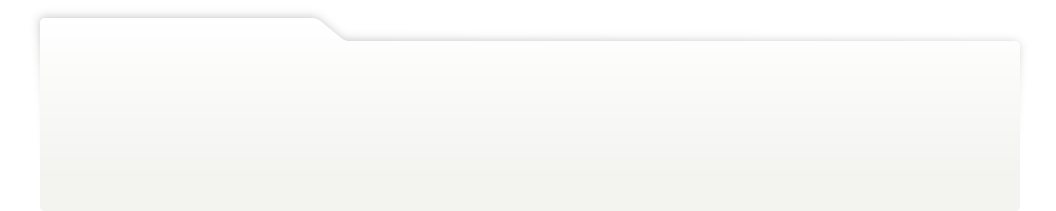
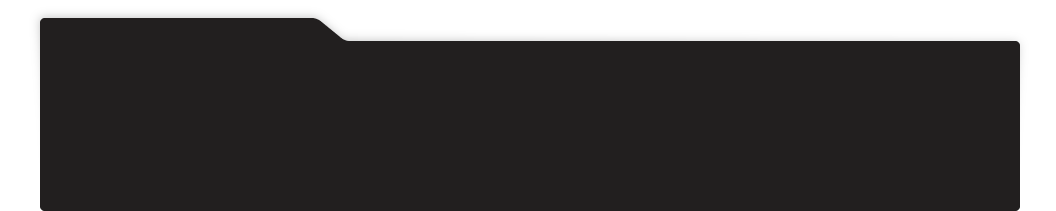
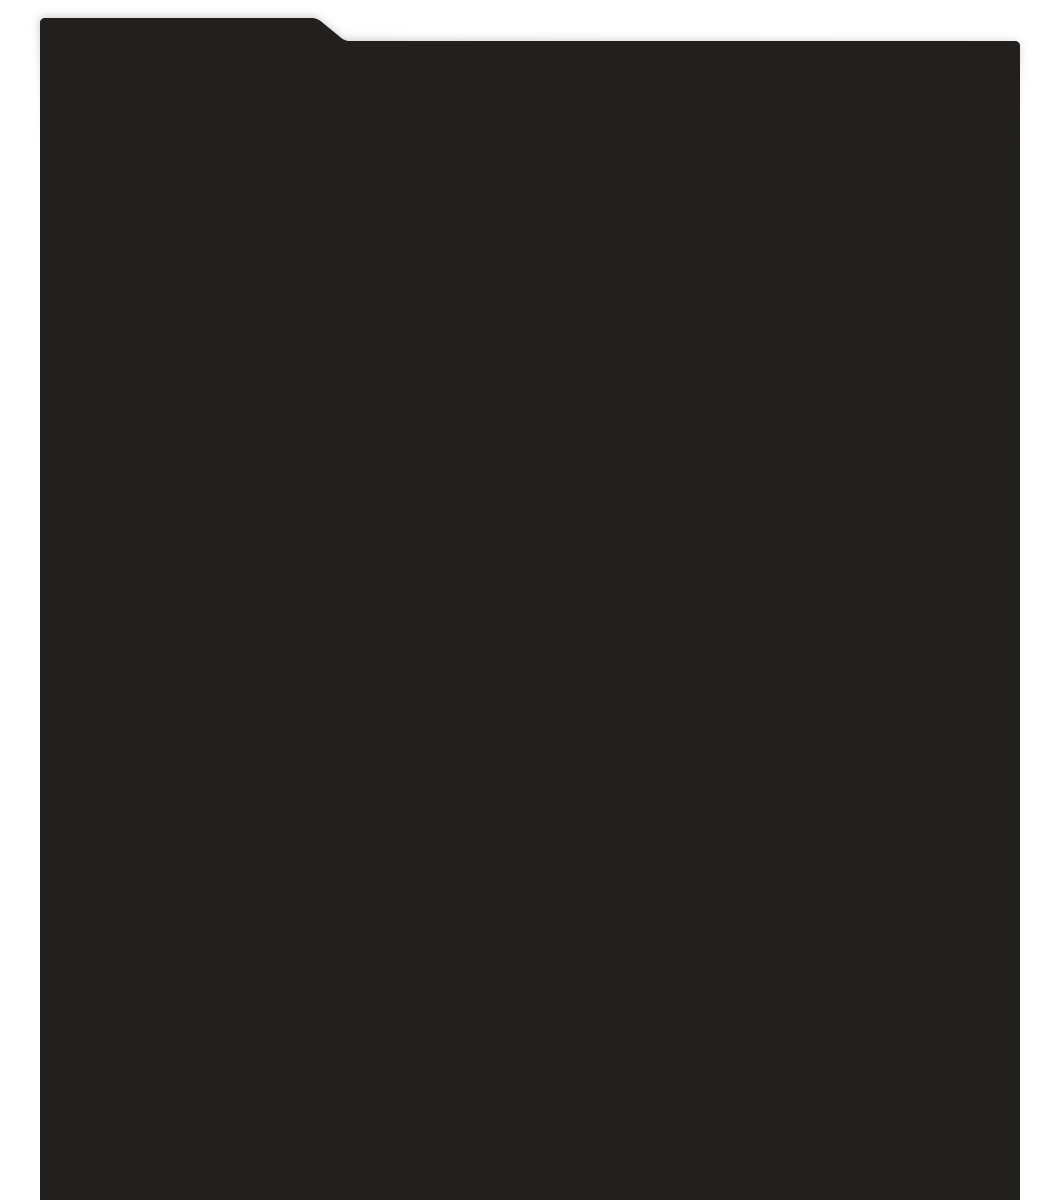
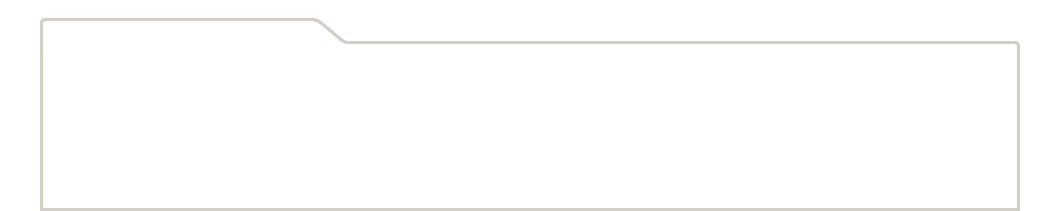
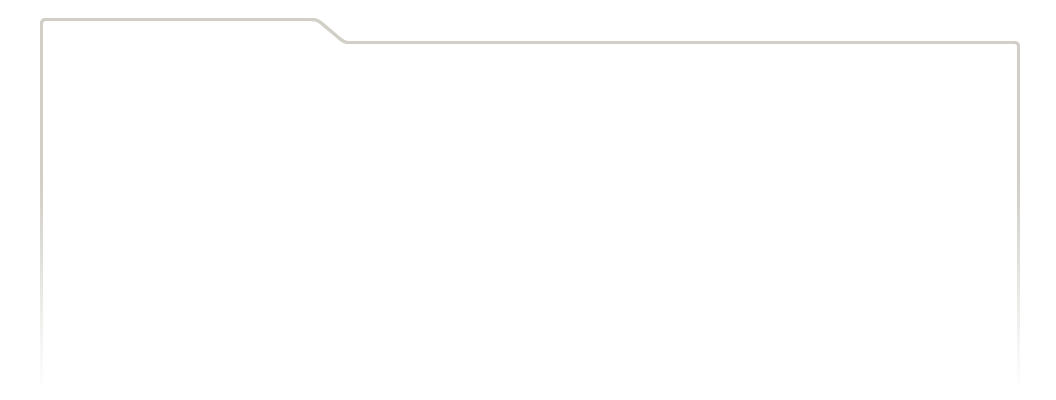
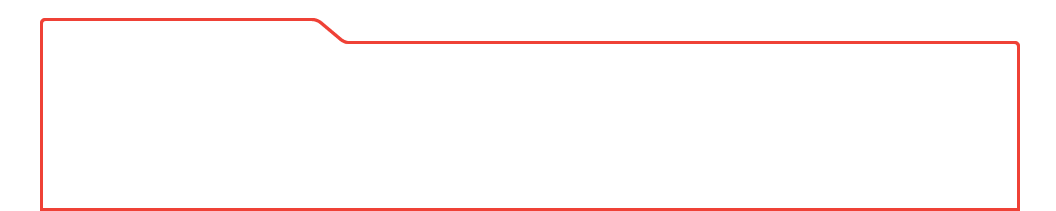
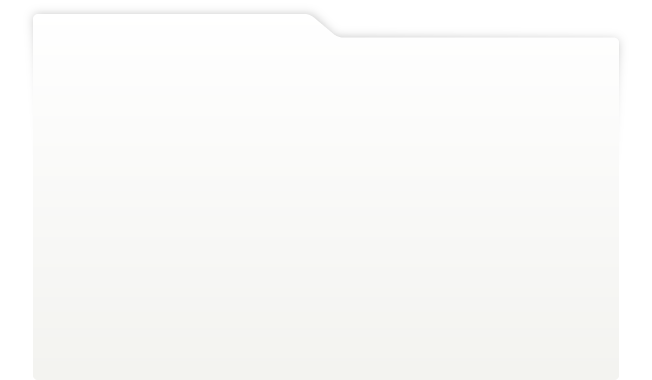
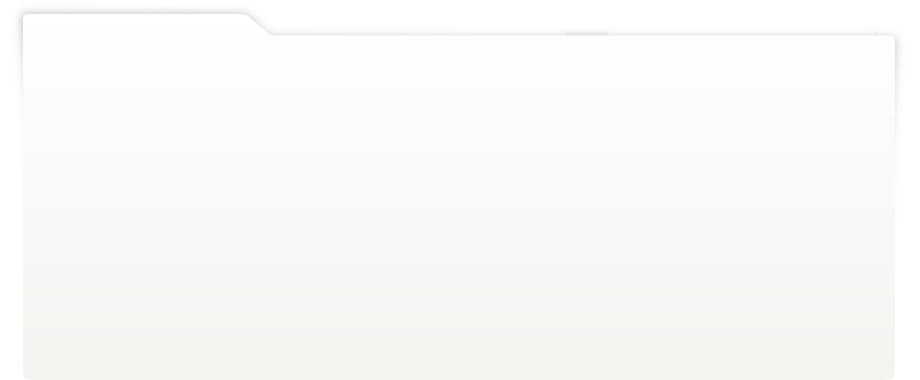
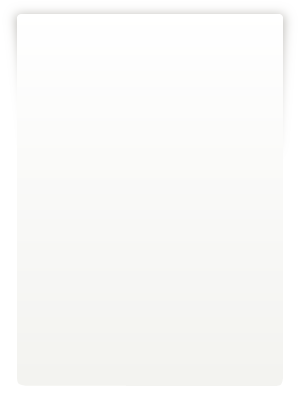
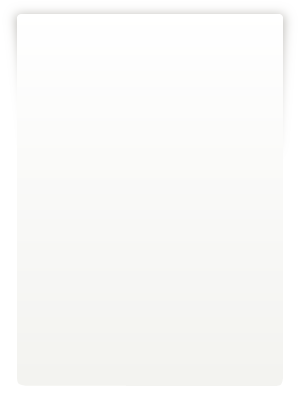
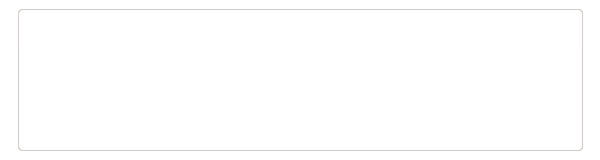
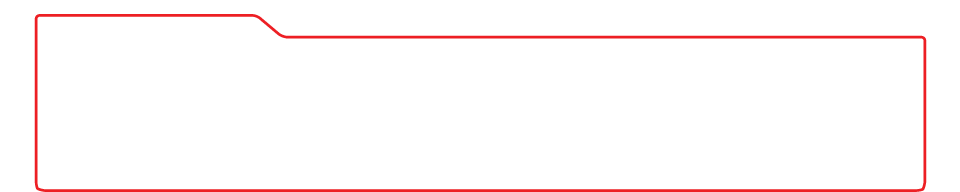
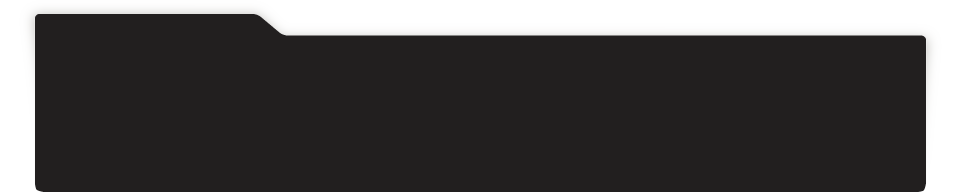
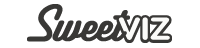
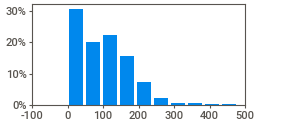
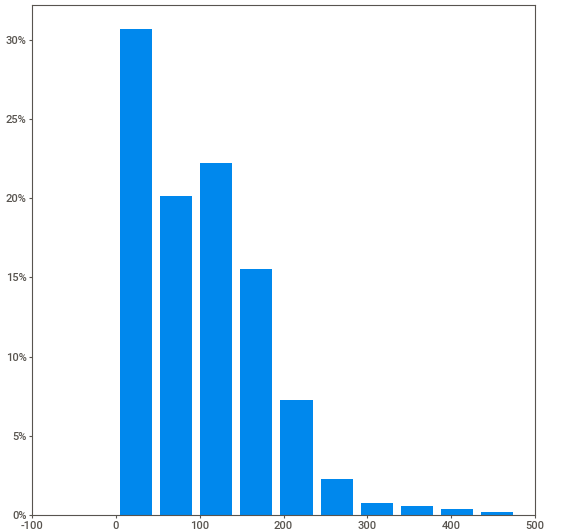
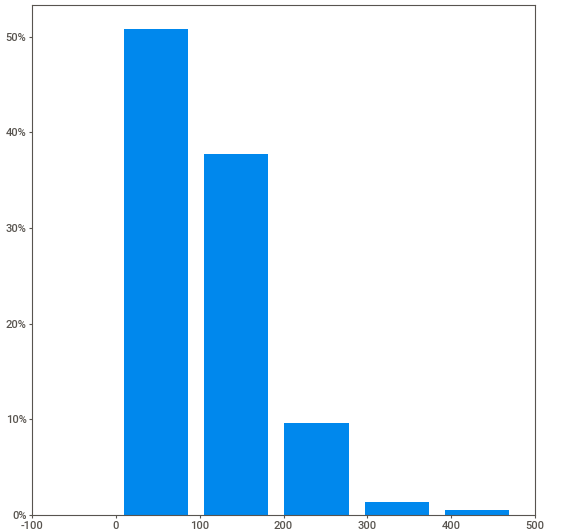
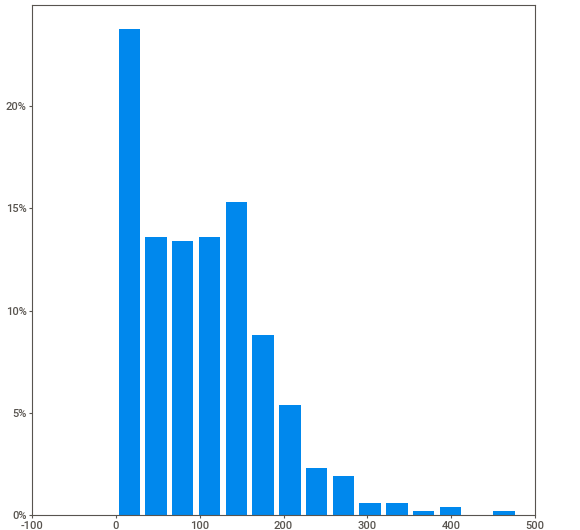
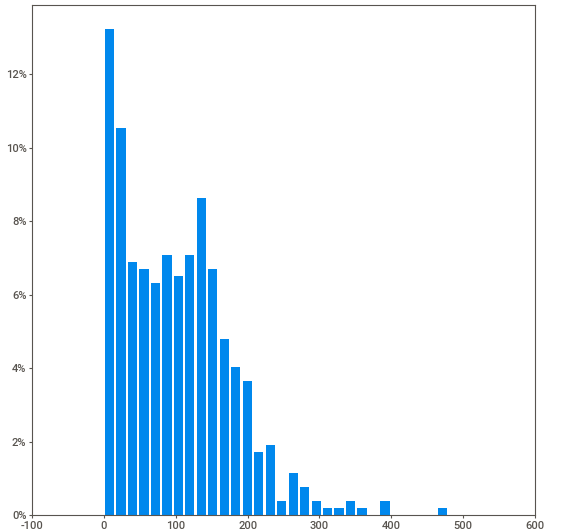
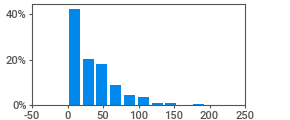
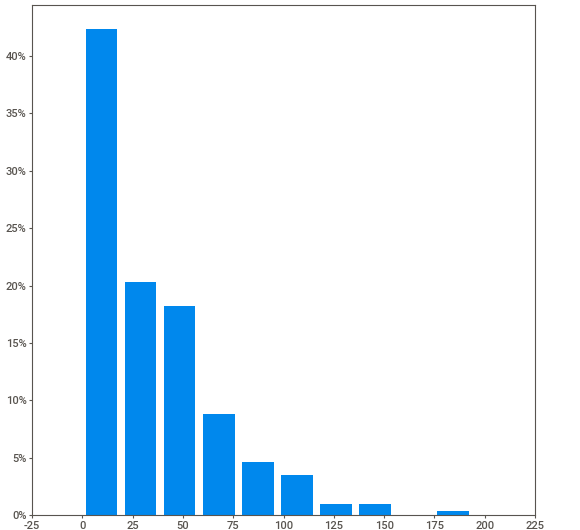
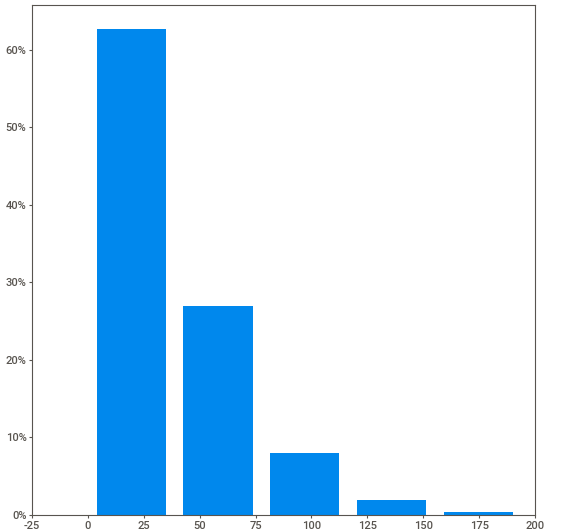
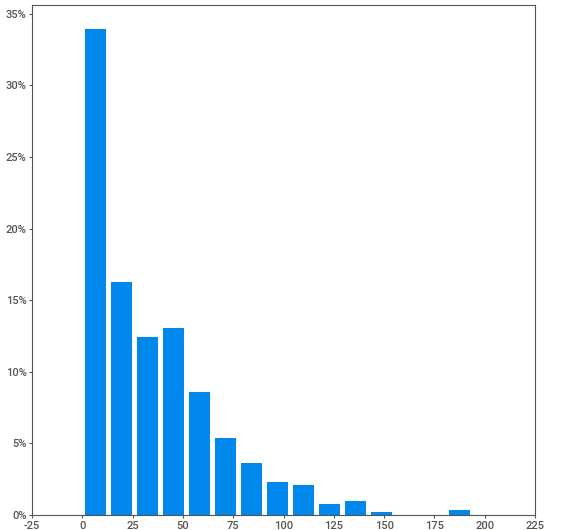
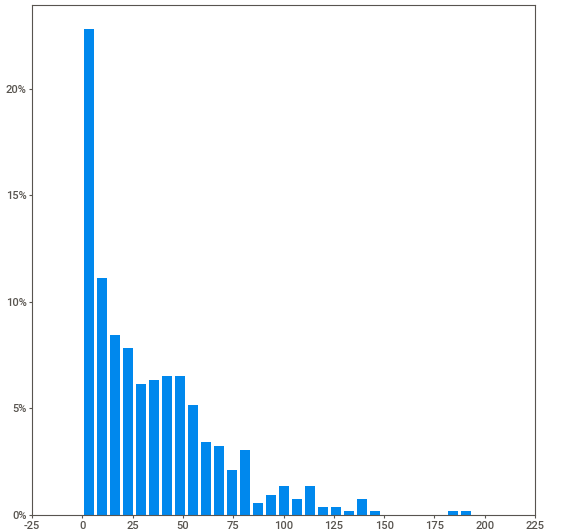
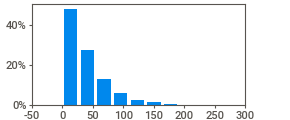
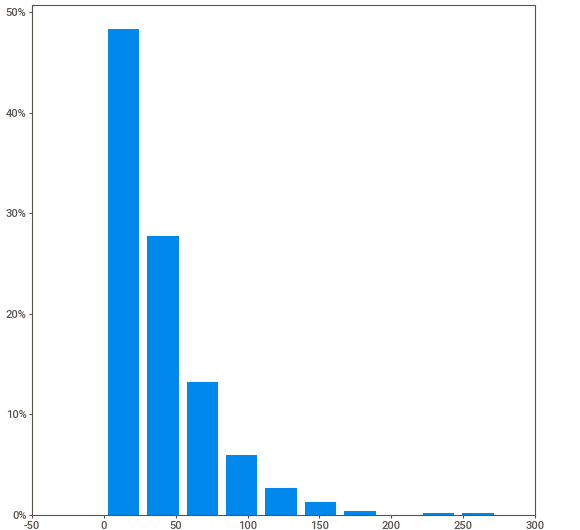
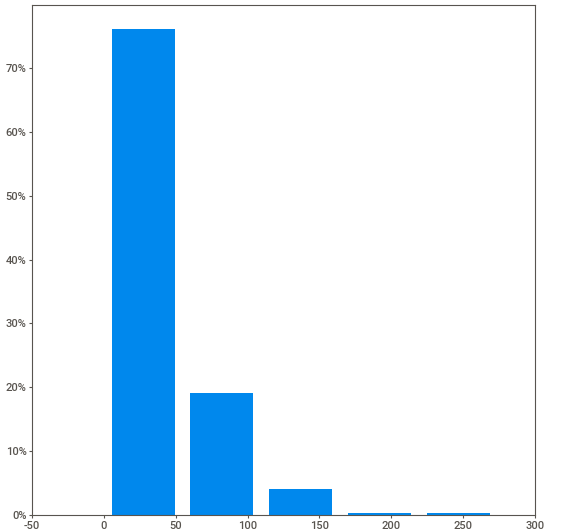
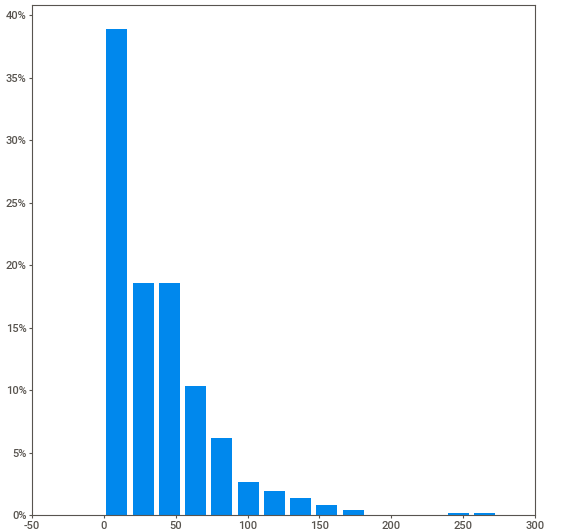
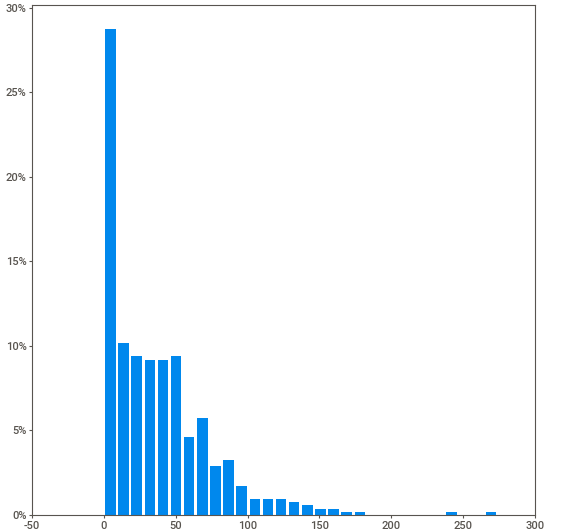
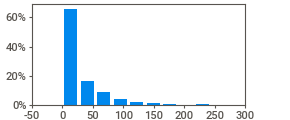
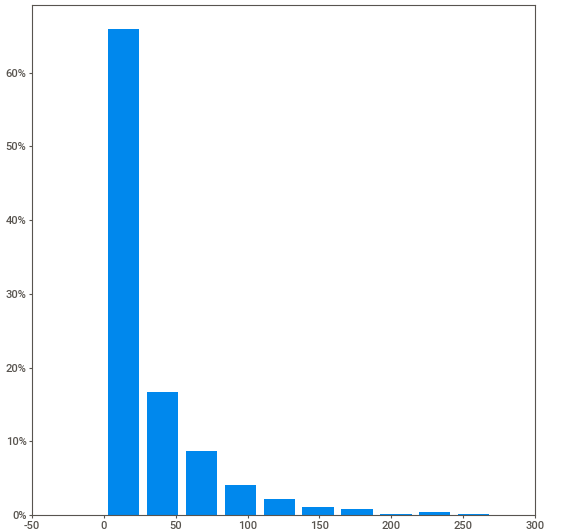
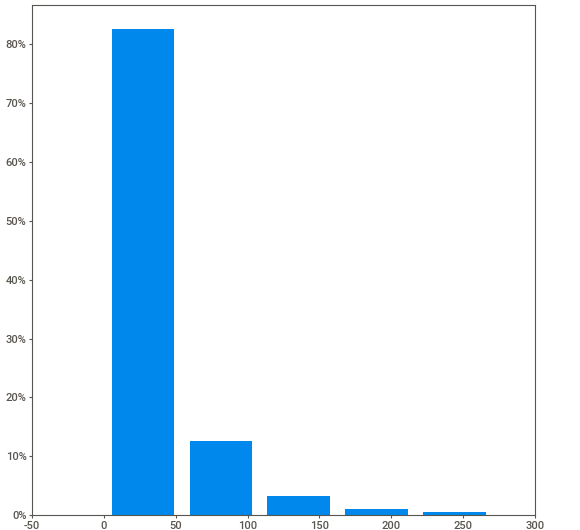
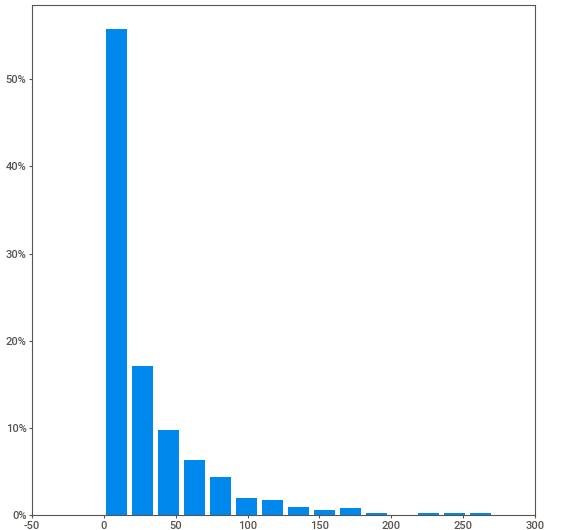
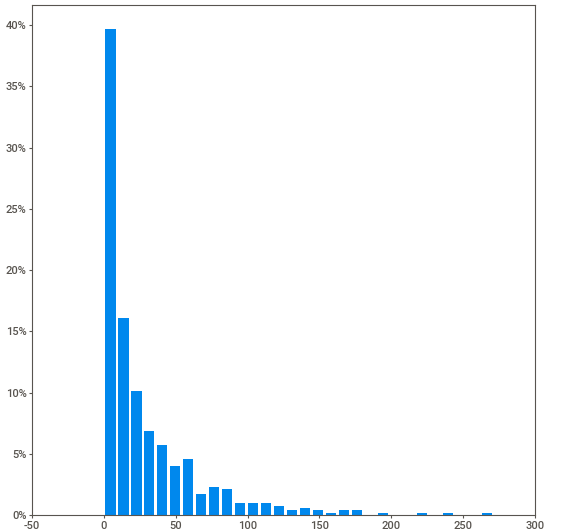
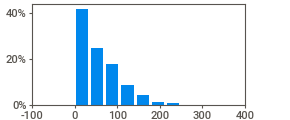
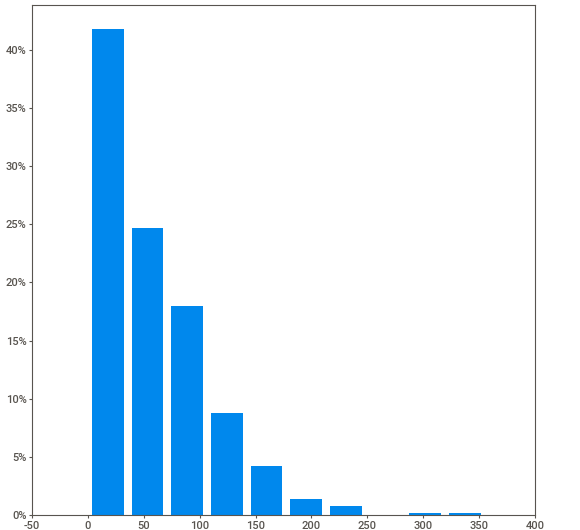
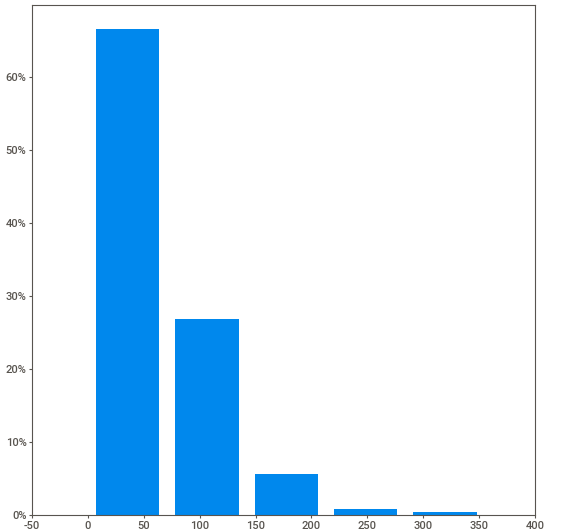
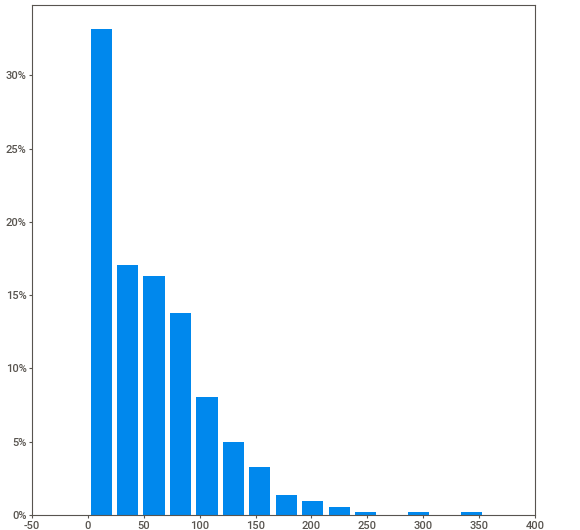
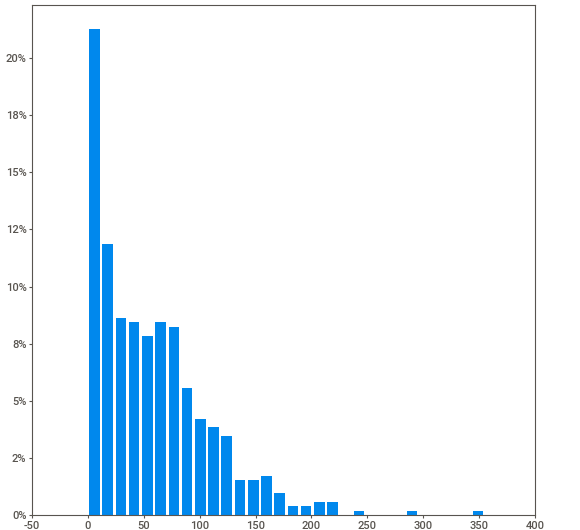
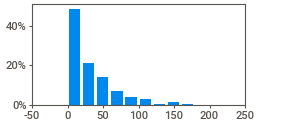
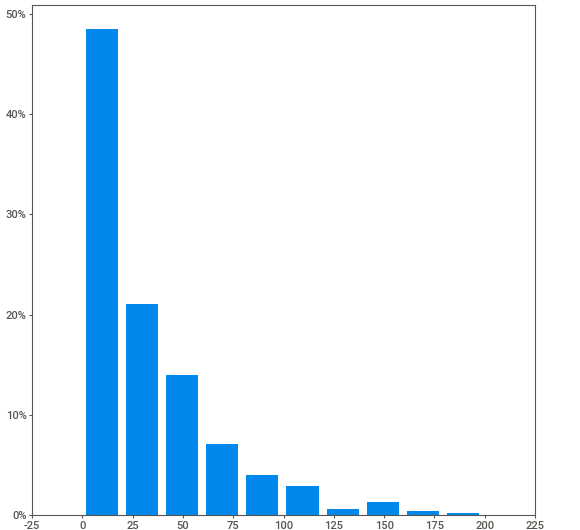
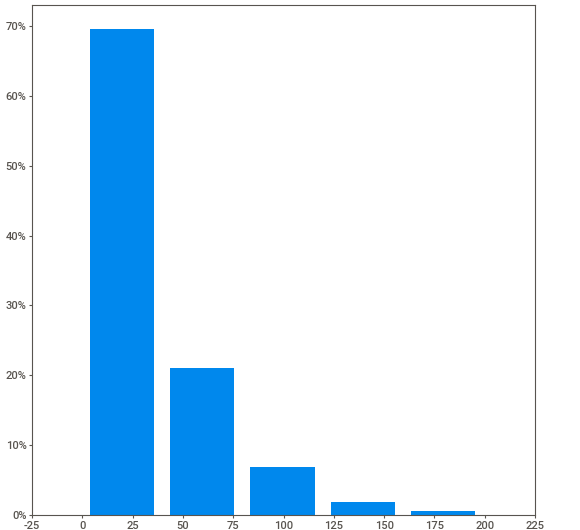
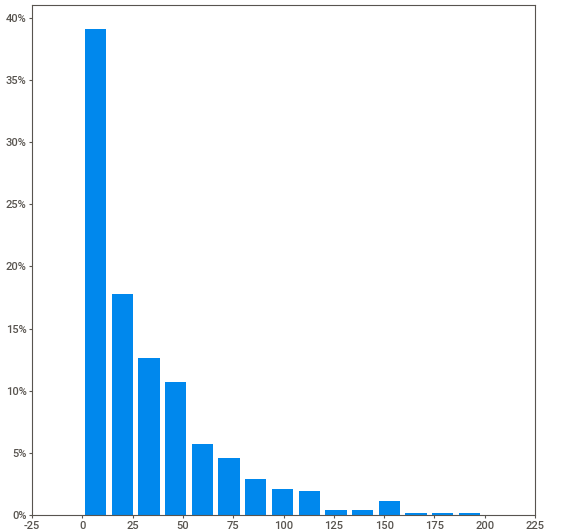
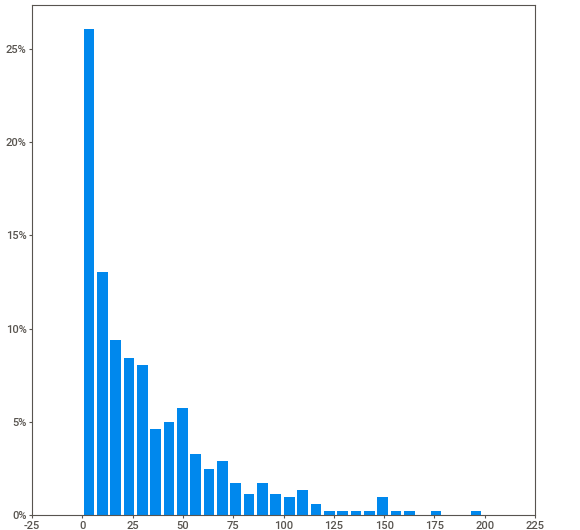
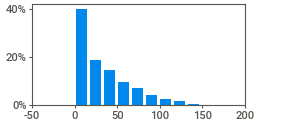
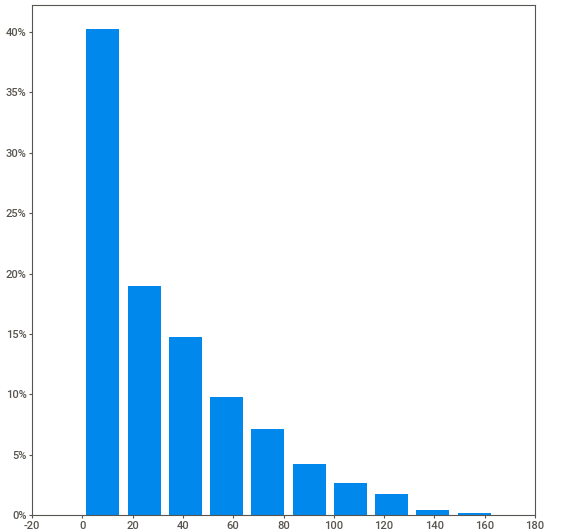
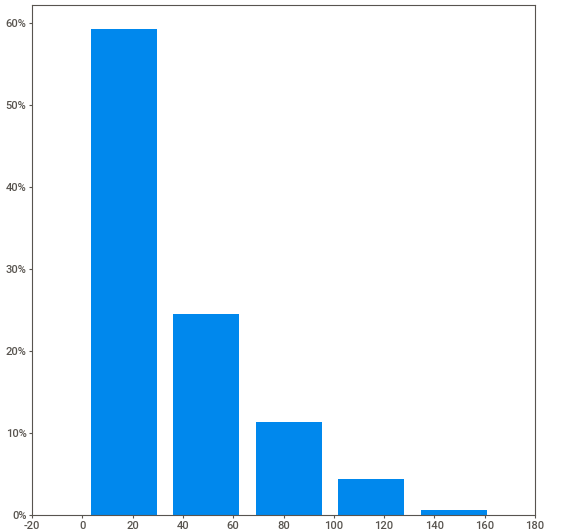
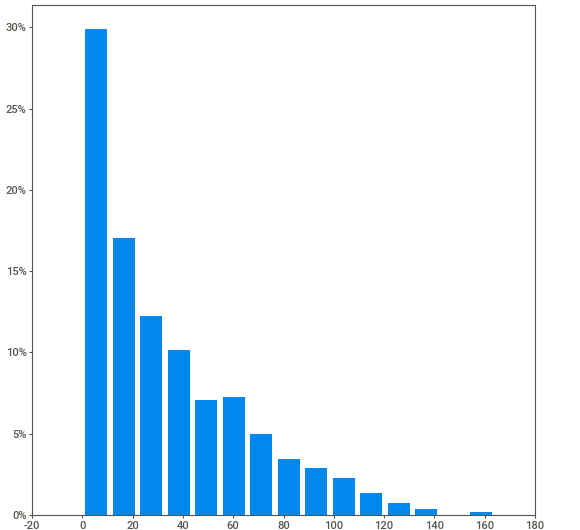
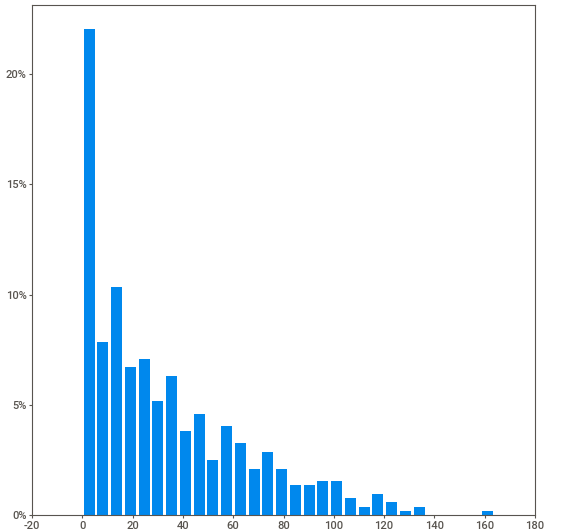
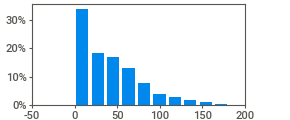
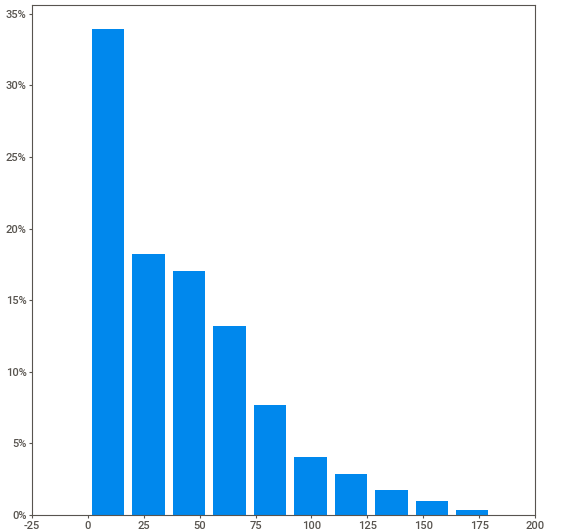
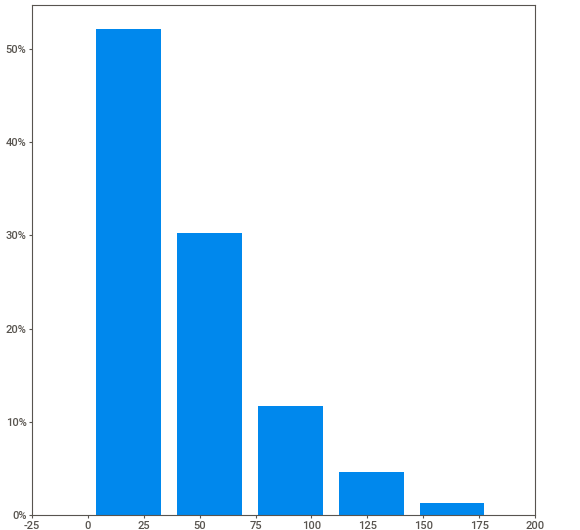
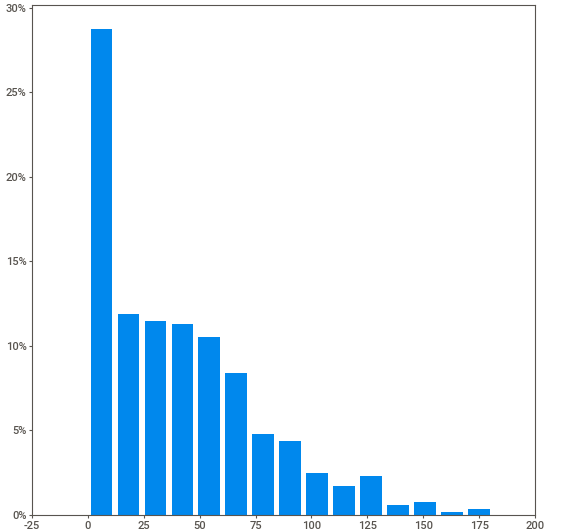
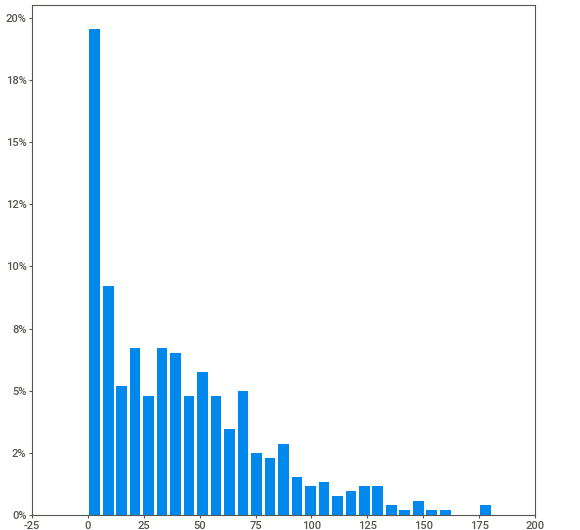
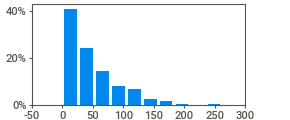
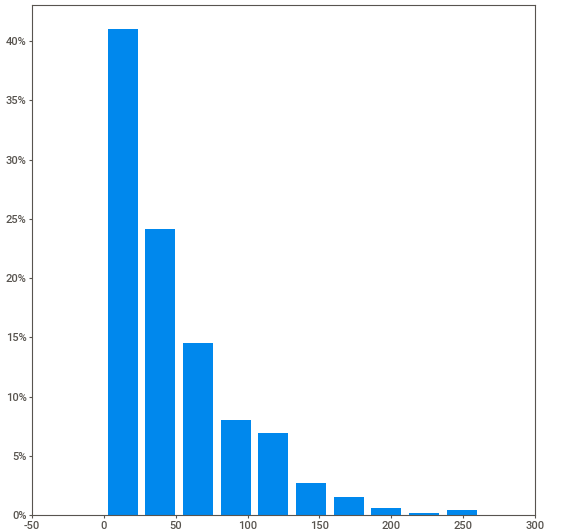
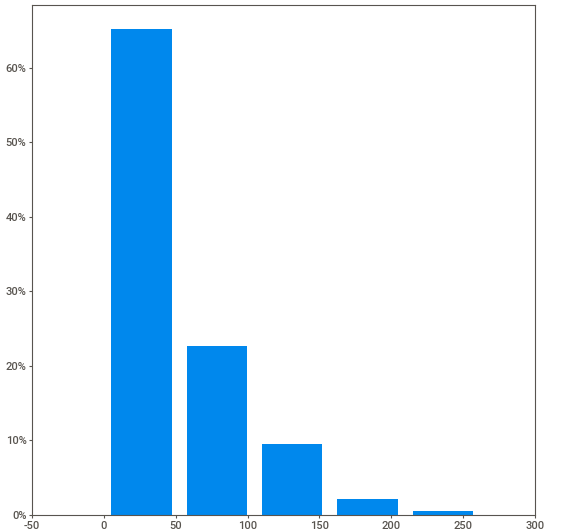
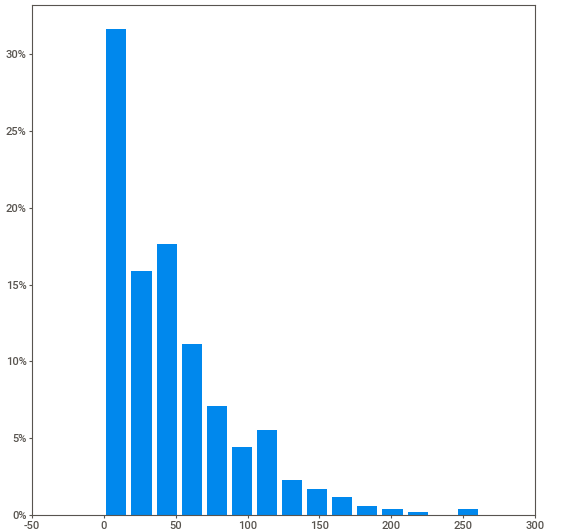
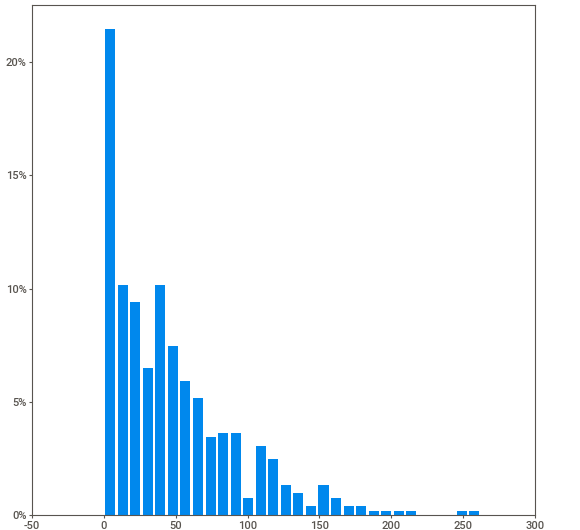
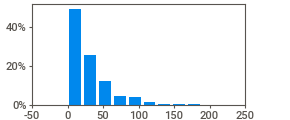
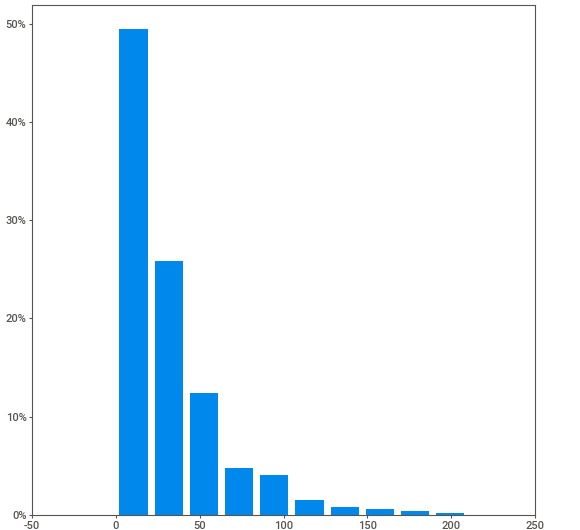
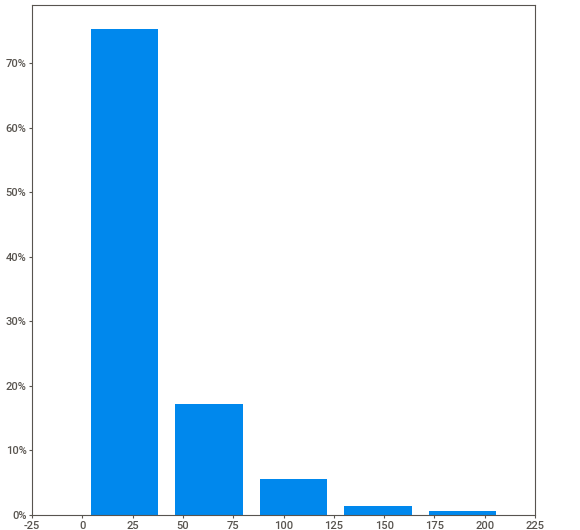
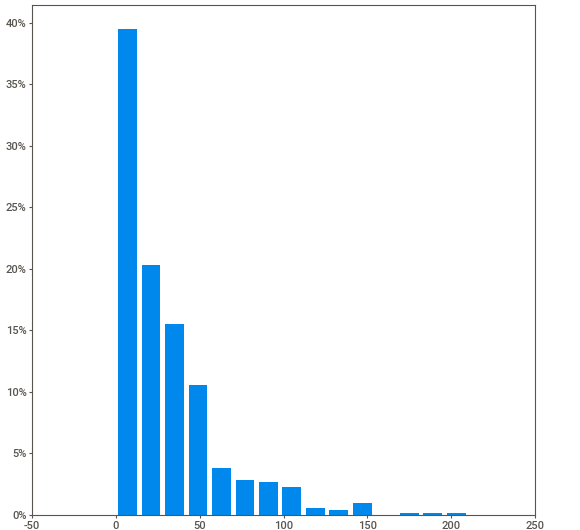
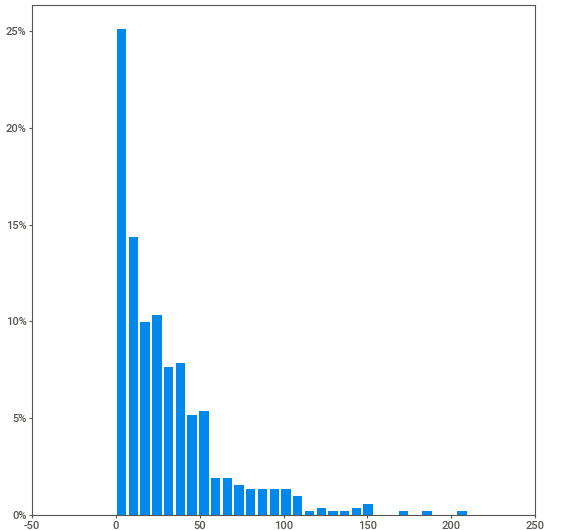
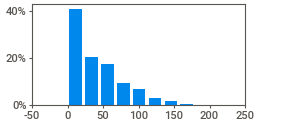
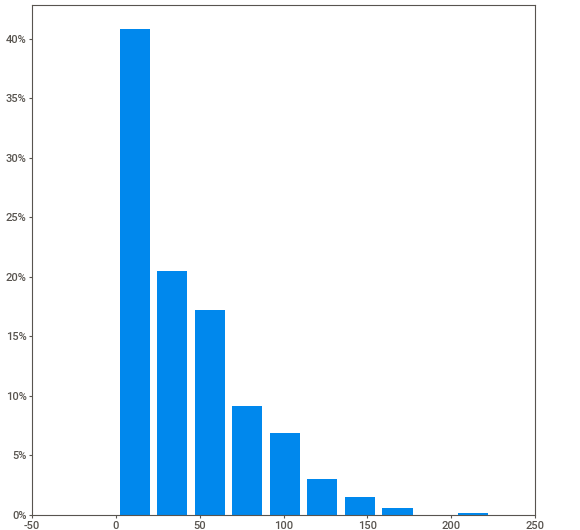
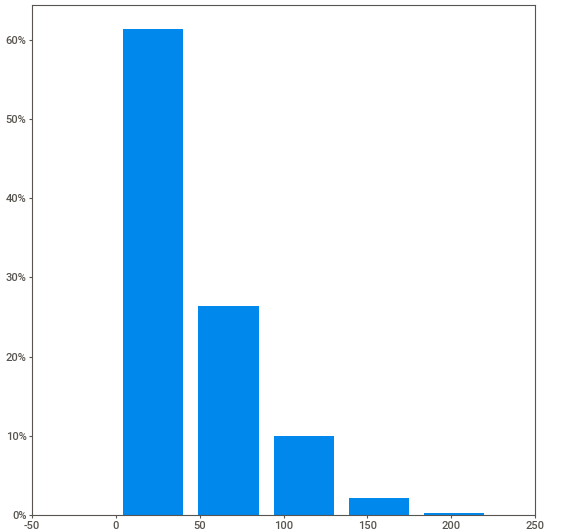
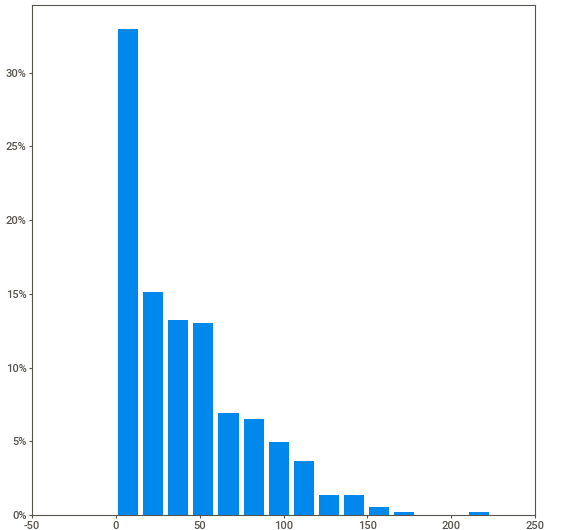
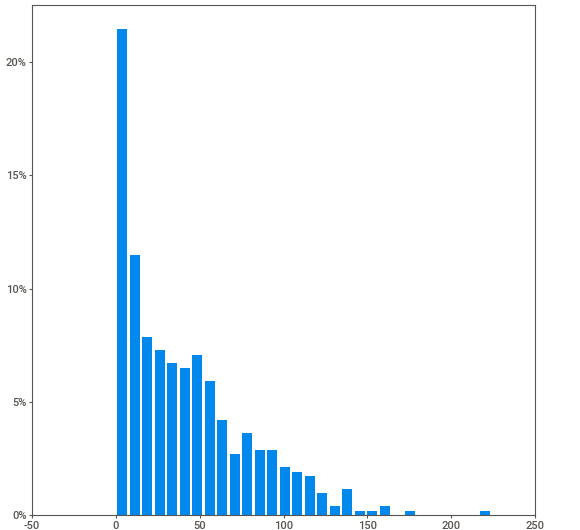
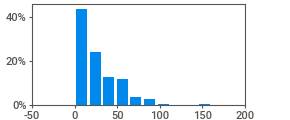
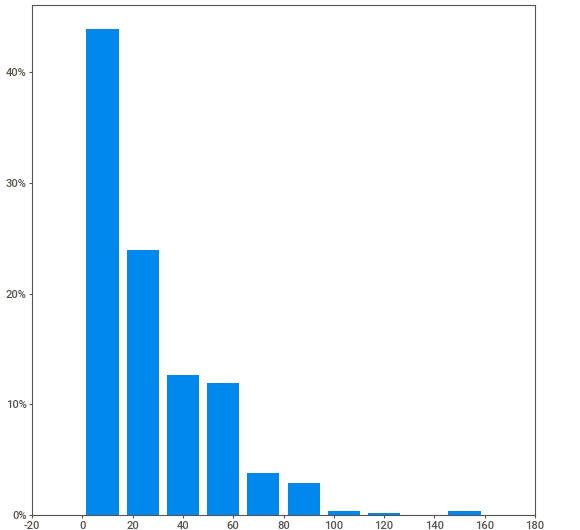
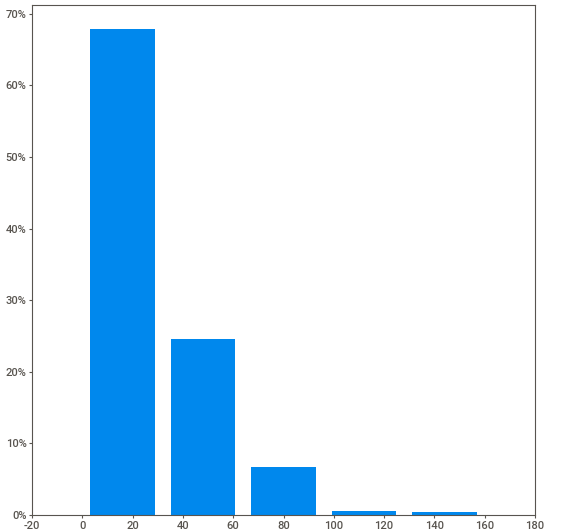
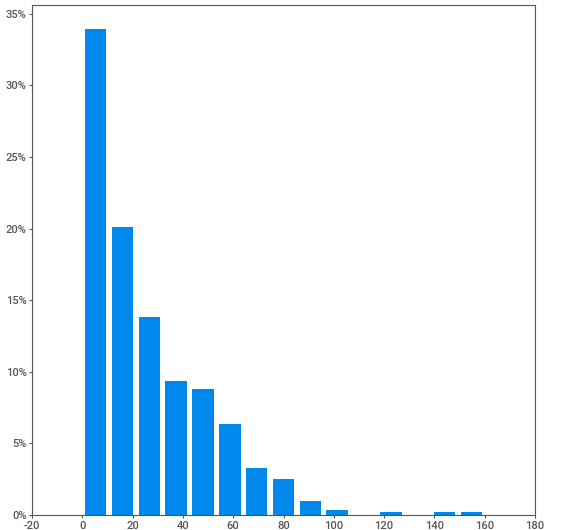
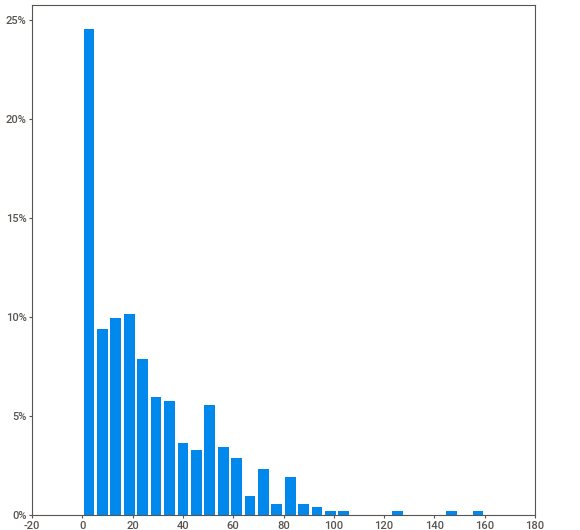
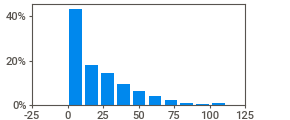
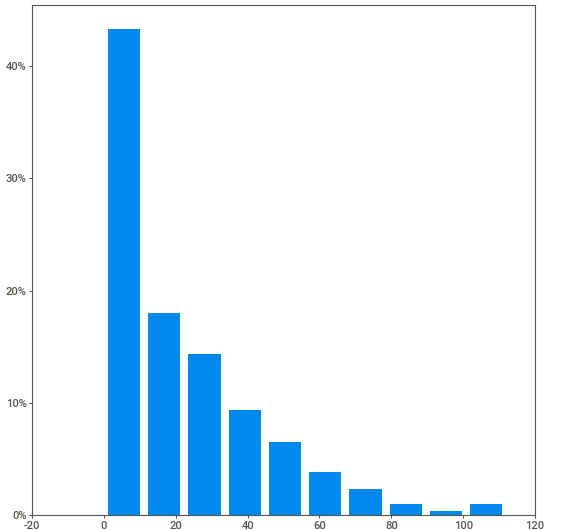
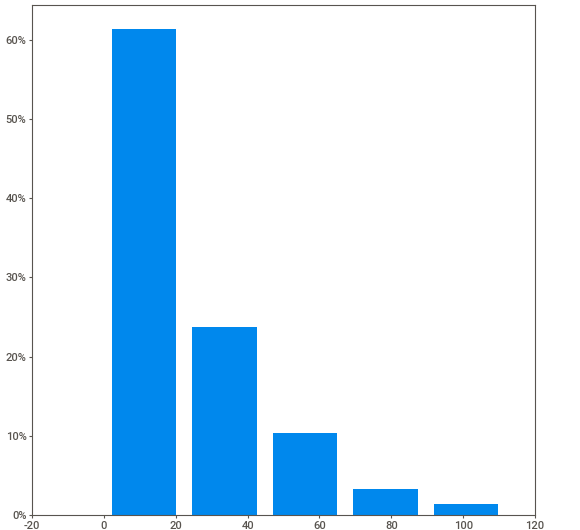
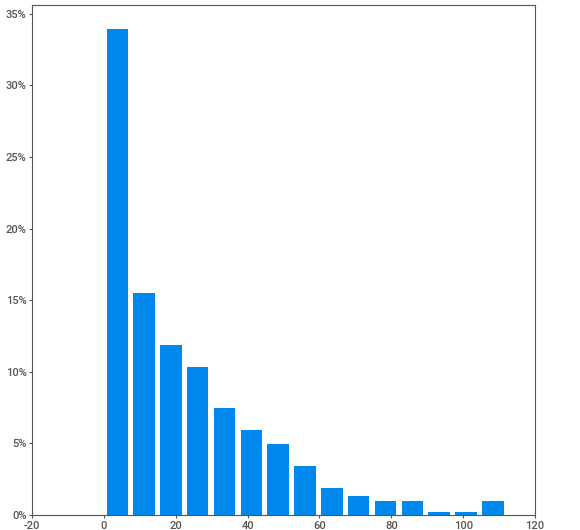
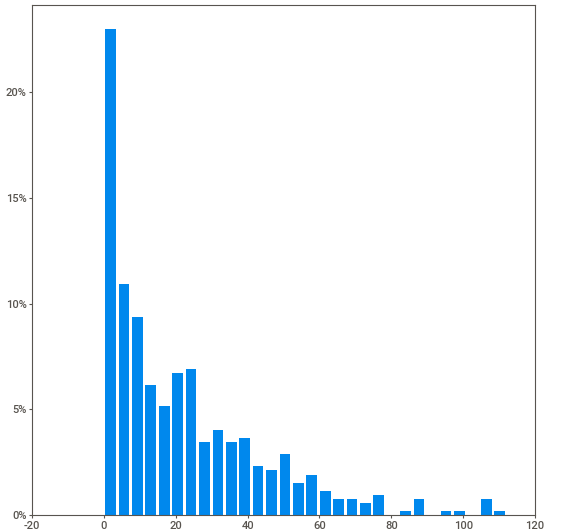
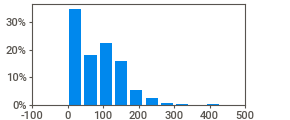
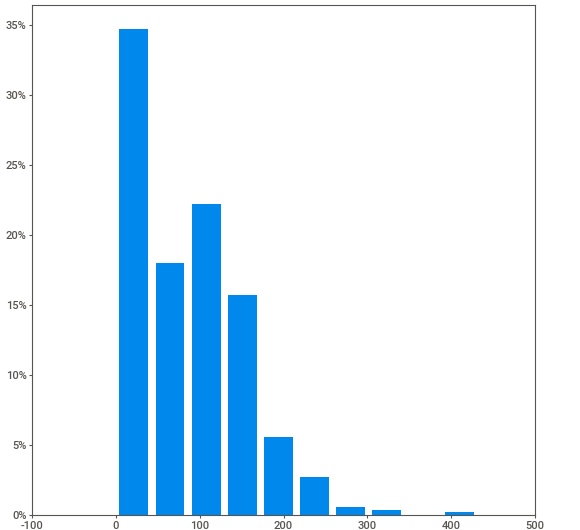
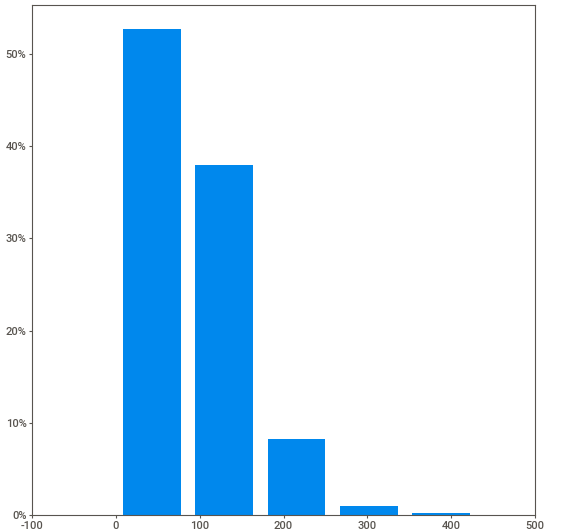
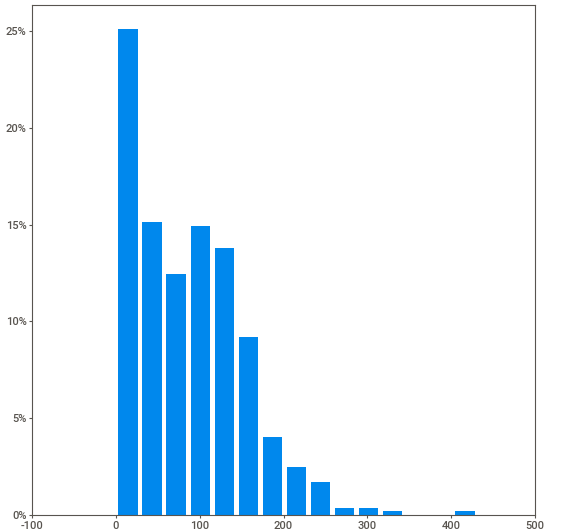
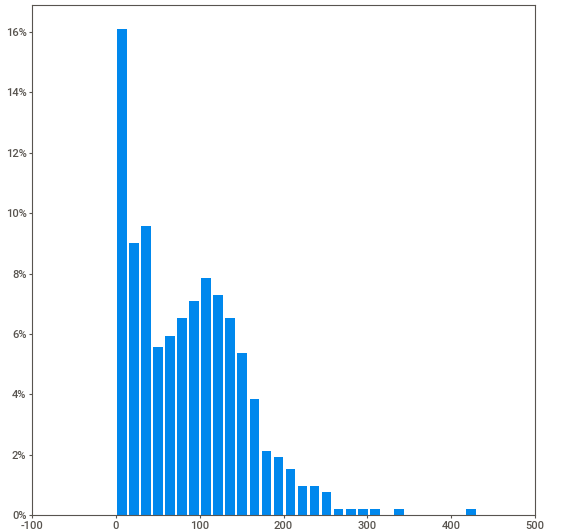
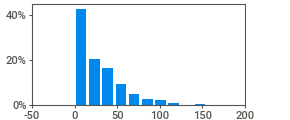
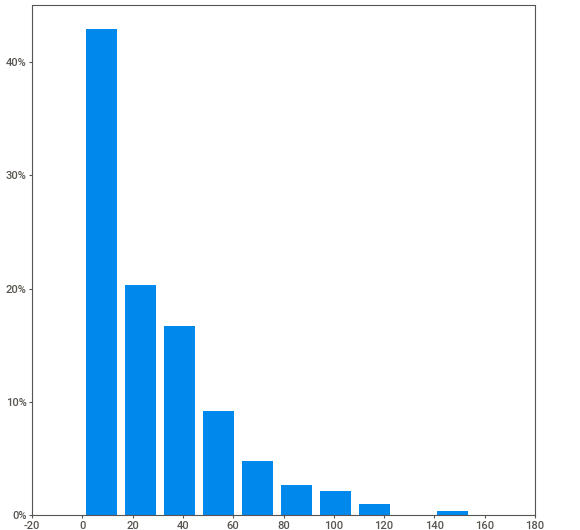
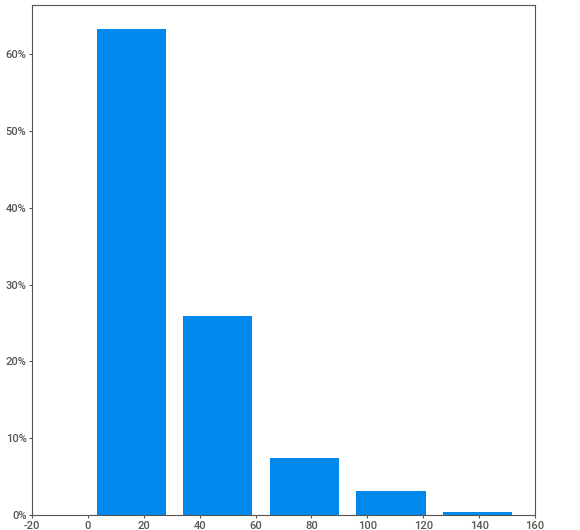
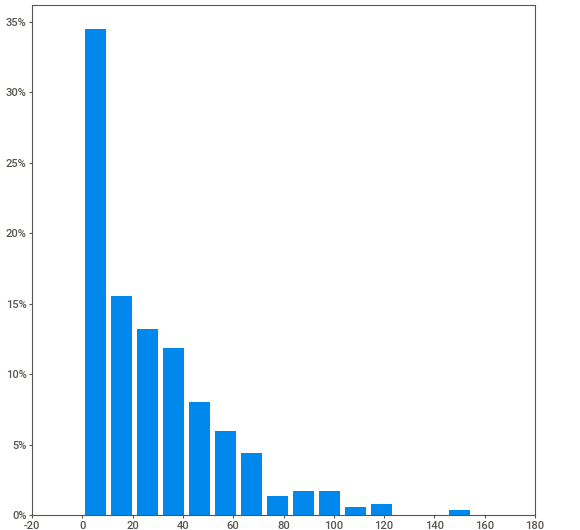
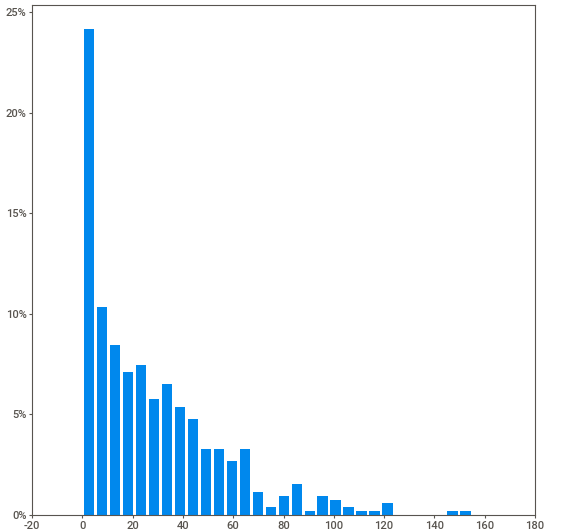
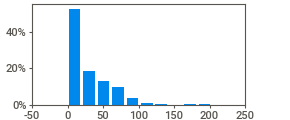
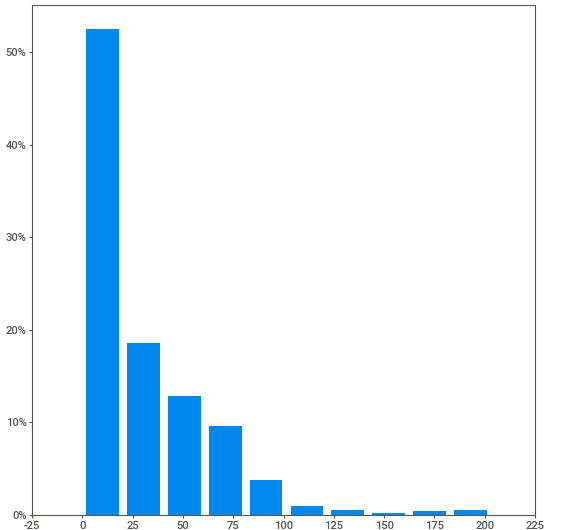
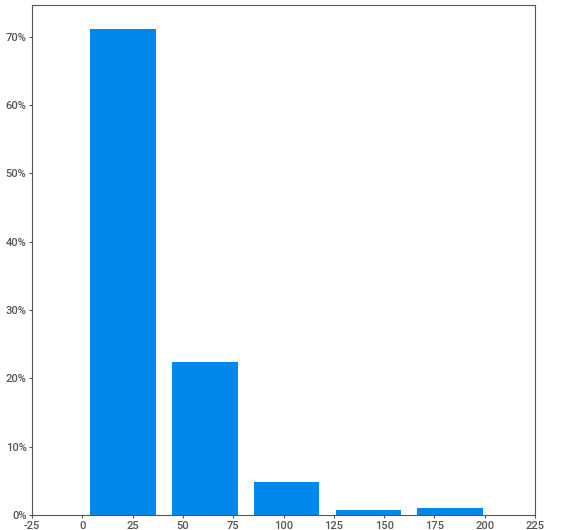
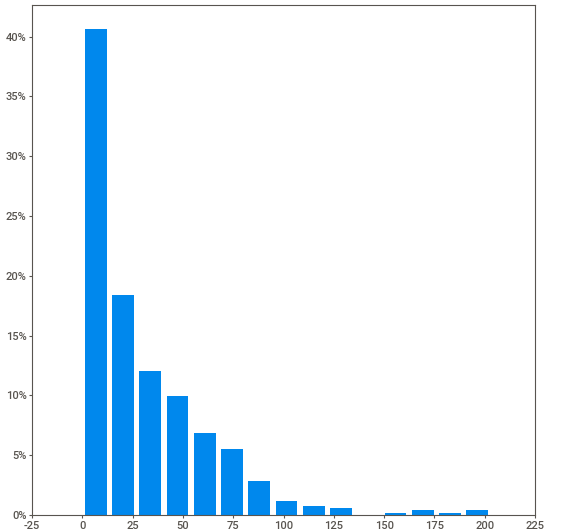
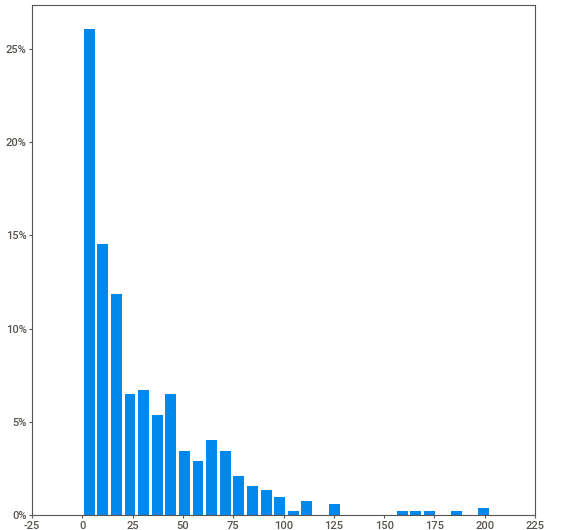
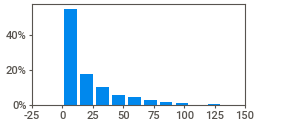
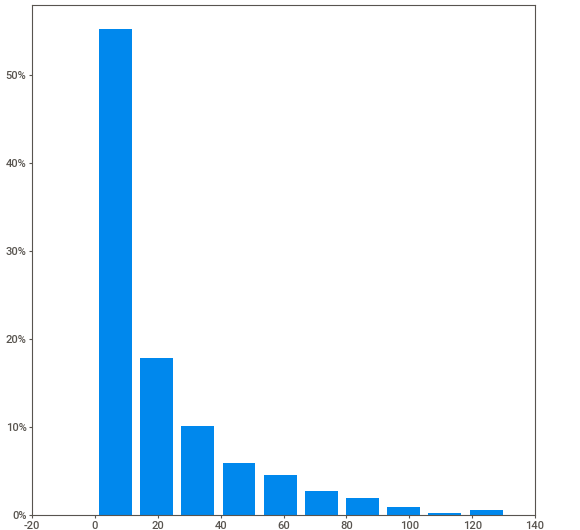
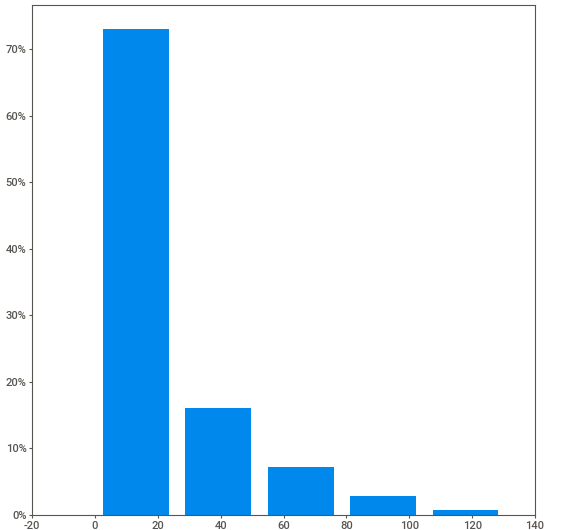
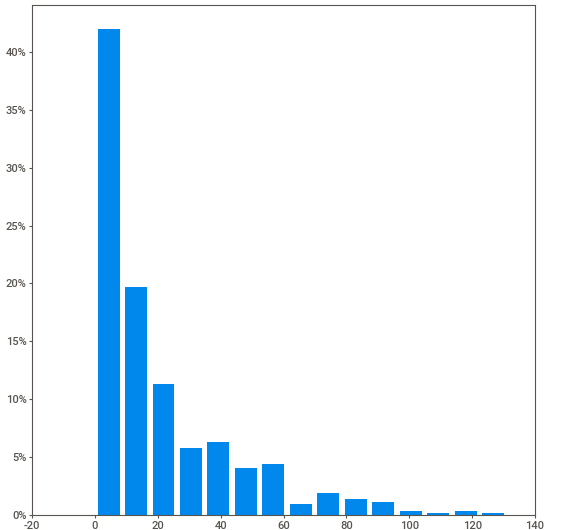
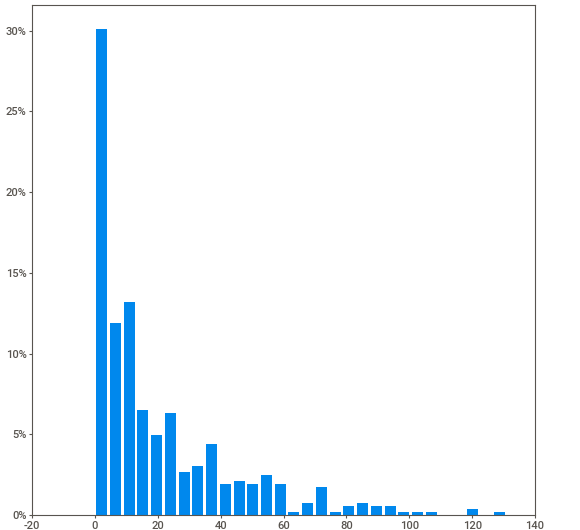
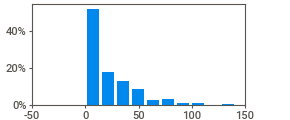
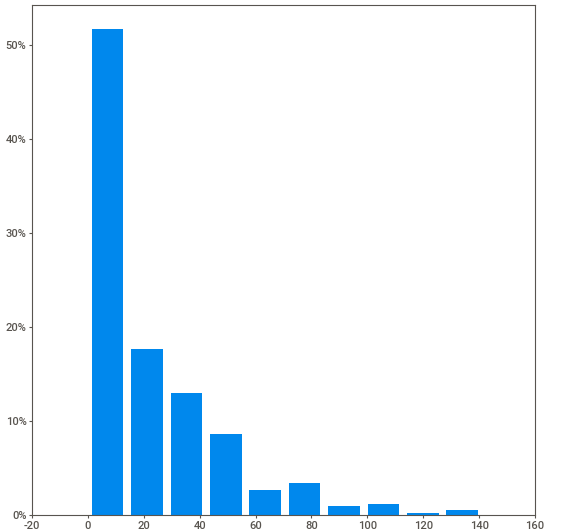
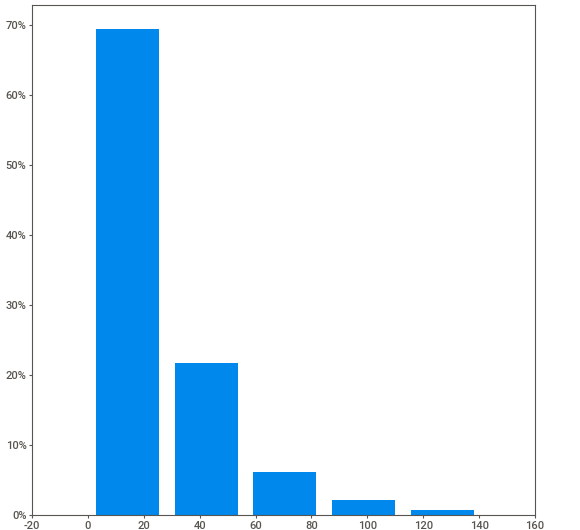
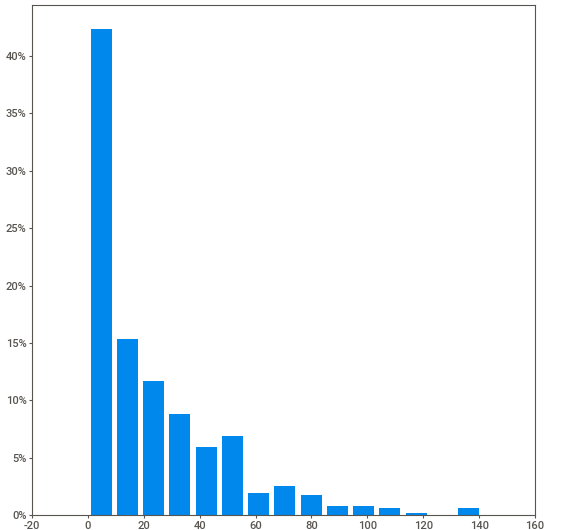
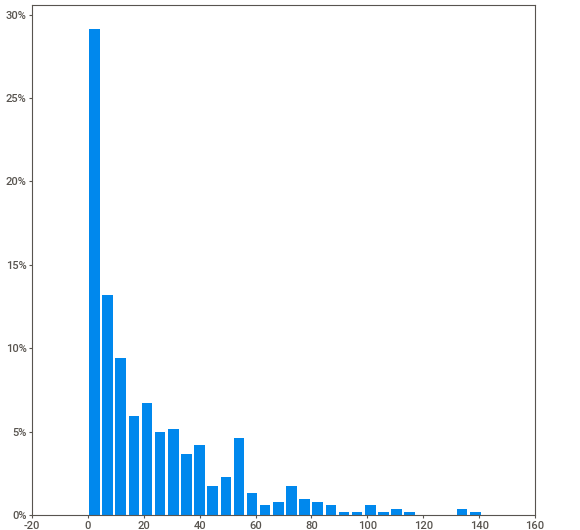
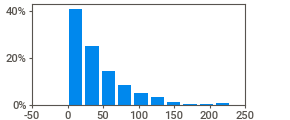
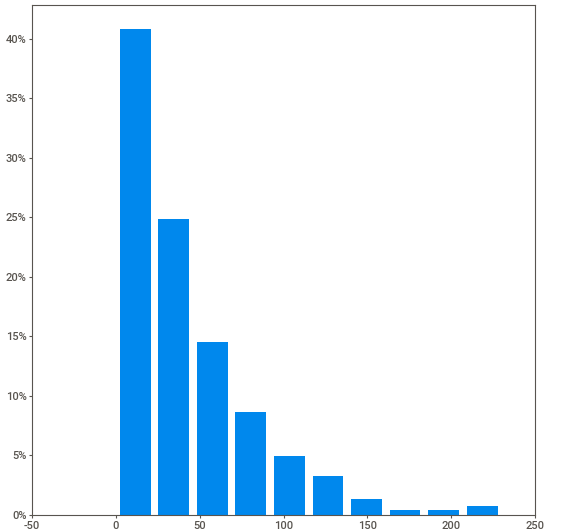
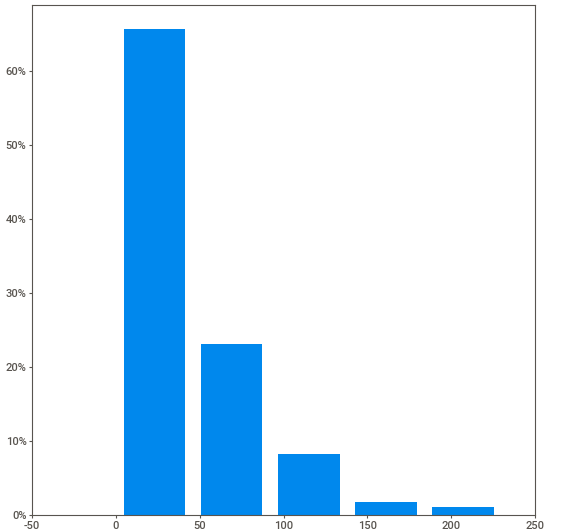
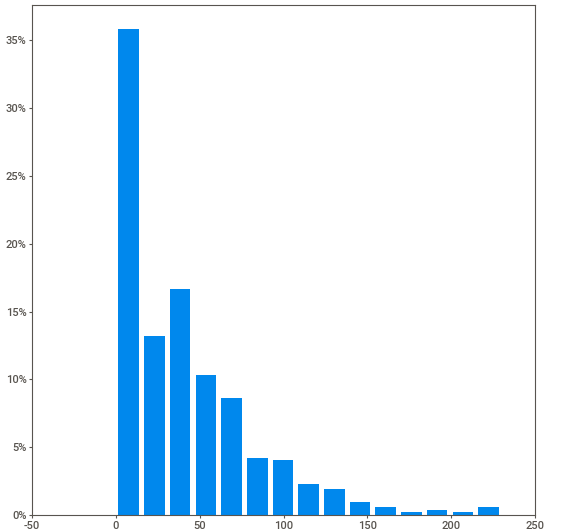
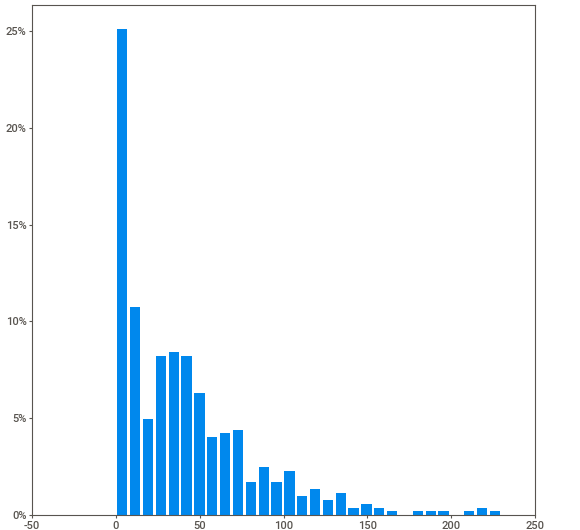
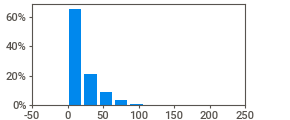
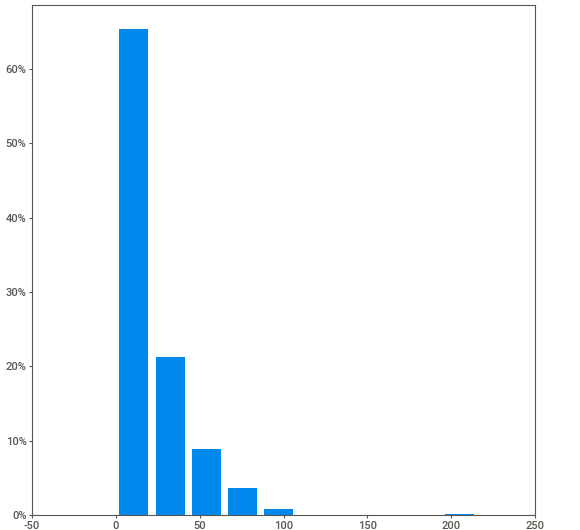
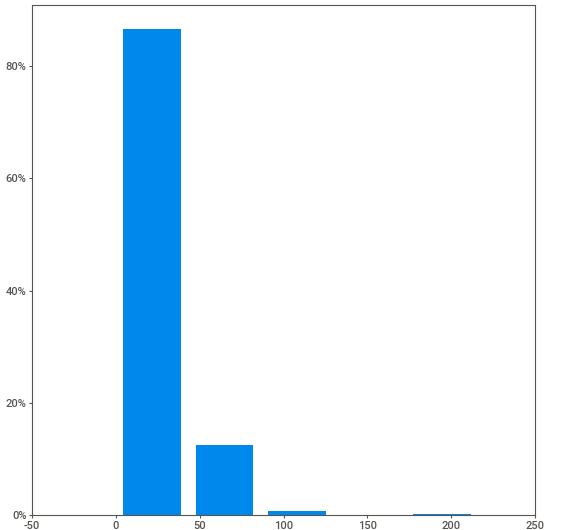
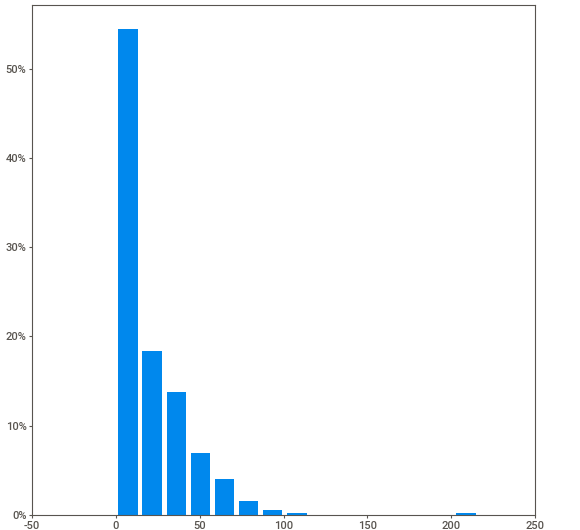
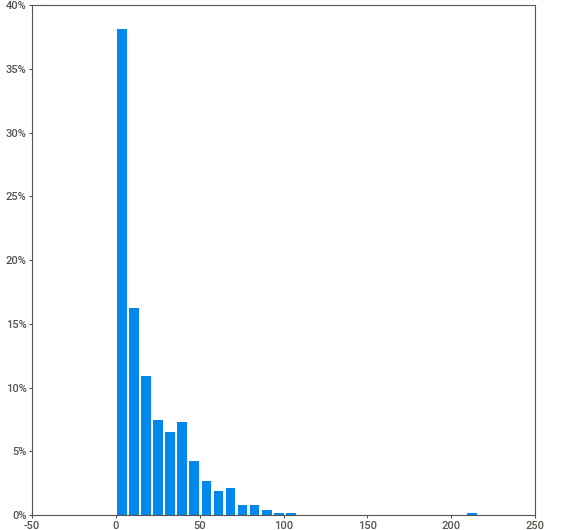
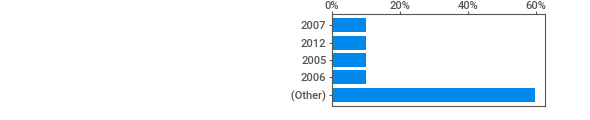
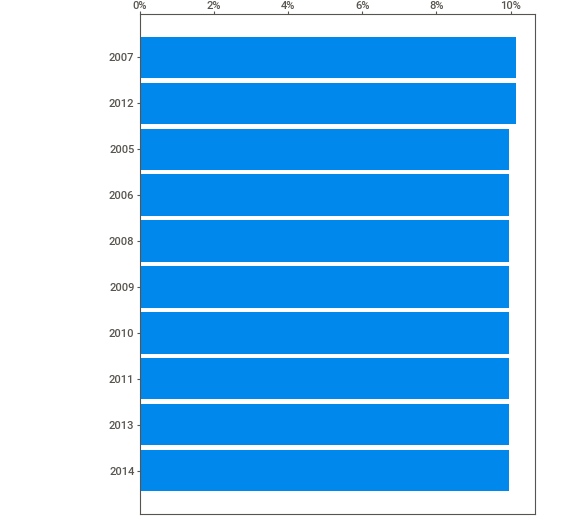
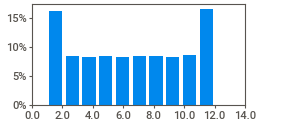
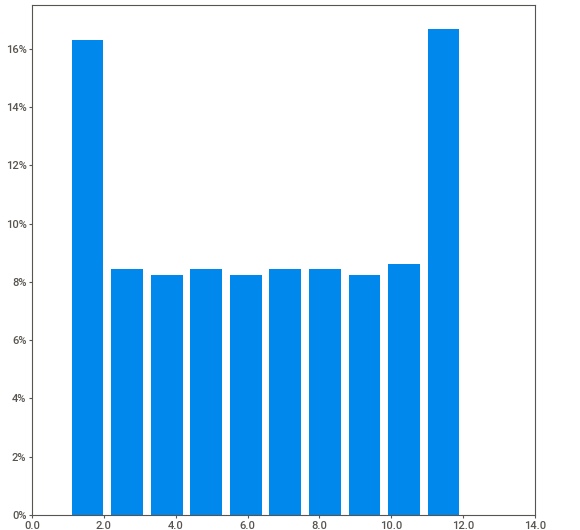
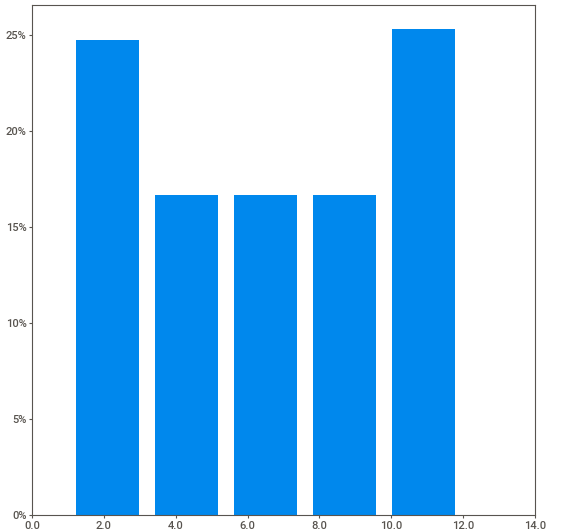
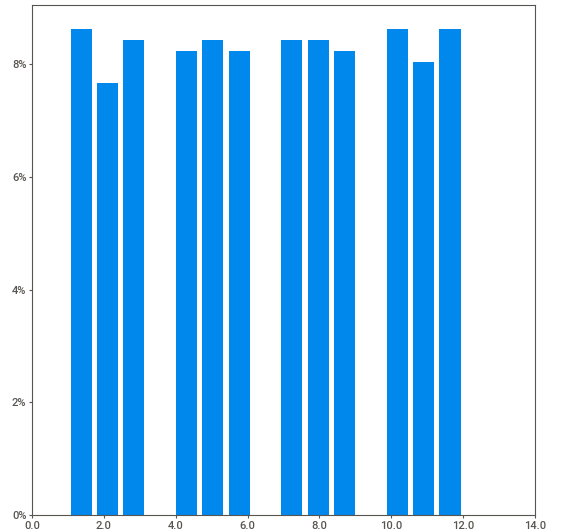
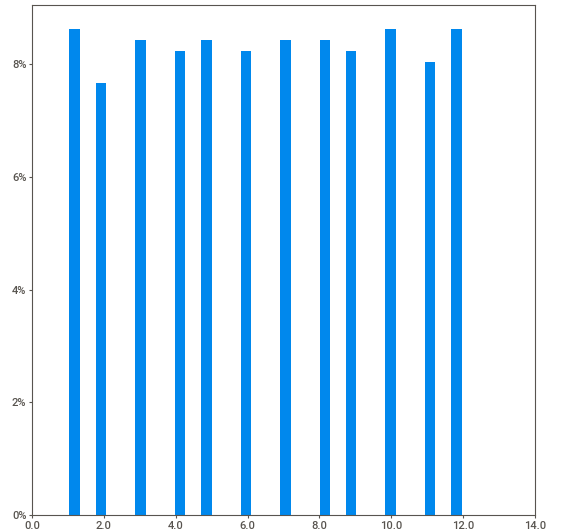
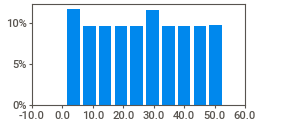
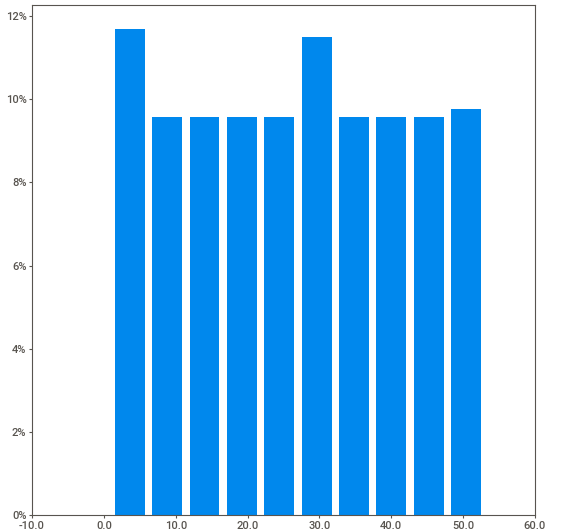
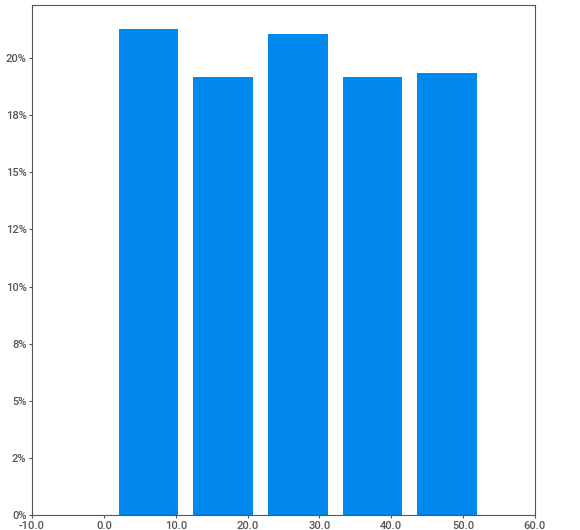
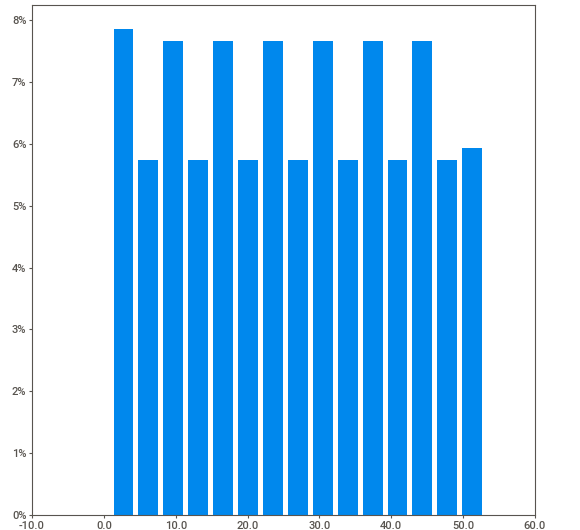
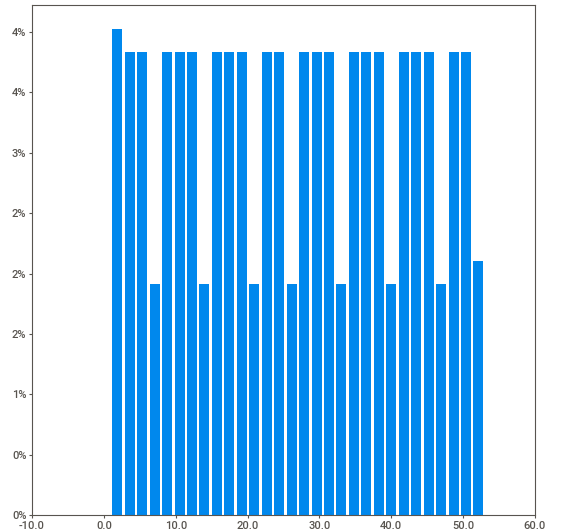
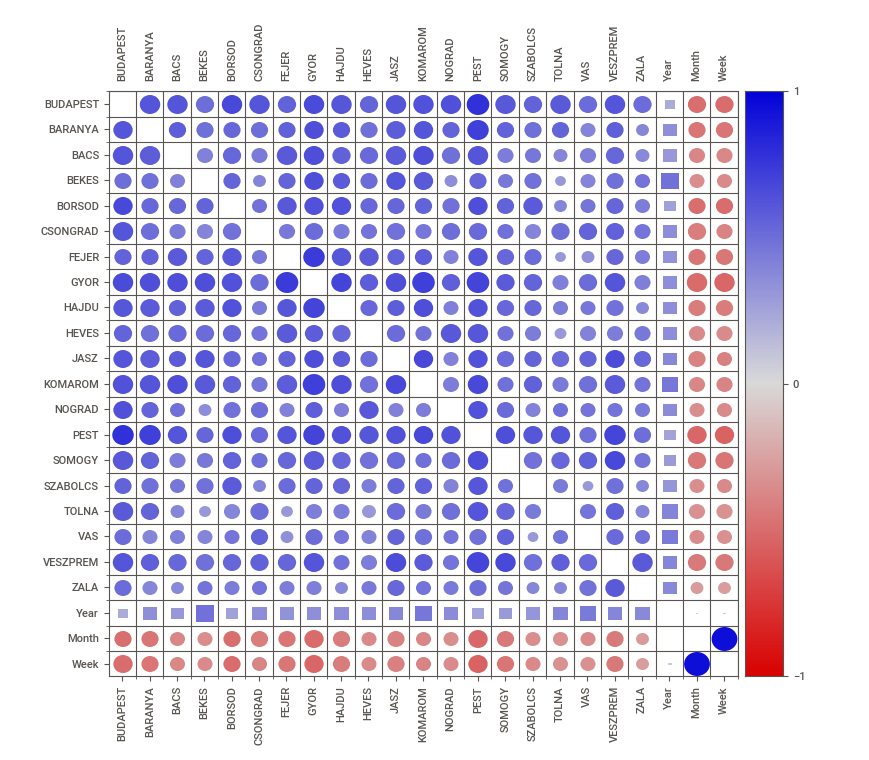
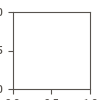

In [25]:
report = sv.analyze(data)
report.show_notebook()